# Ensemble Techniques Project

## Objective
To predict which customer is more likely to purchase the newly introduced travel package.

## <a id = "TOC"></a> Table of Contents
- <a href = #link1>Import Libraries and Load Dataset </a>

- <a href = #link2>EDA</a> 

- <a href = #link3>Insights from EDA</a>

- <a href = #link4>Data Pre-Processing</a> 

- <a href = #link5>Model Buidling: Bagging</a>

- <a href = #link6>Model Performance Improvement: Bagging</a>

- <a href = #link7>Model Building: Boosting</a>

- <a href = #link8>Model Performance Improvement: Boosting</a>

- <a href = #link9>Model Performance Evaluation</a>

- <a href = #link10>Actionable Insights and Recommendations</a>

## Data Dictionary
#### Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Product taken flag
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisited: Total number of person came with customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of the trip in a year by customer
* Passport: The customer has passport or not
* OwnCar: Customers owns a car flag
* NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfactory score
* ProductPitched: Product pitched by a salesperson
* NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
* DurationOfPitch: Duration of the pitch by a salesman to customer

#### Observations
- This is a CLASSIFICATION problem
- Will likely be able to drop customerID 
- At first glance, I don't see any features that are likely to have high correlation, but will check.
- Many of these features could have a lot of skew, will need to check for imbalances in the data

# <a id = "link1"></a>1. Import Libraries and Load Dataset

### Import relevant libraries 

In [419]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import relevant items from sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# Import XGBoost (previously installed)
from xgboost import XGBClassifier

# Supress warnings
#import warnings
#warnings.filterwarnings('ignore')

### Read the dataset

In [257]:
# Import the data from the Excel document. The data is on the second sheet, labeled "Tourism".
df = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')

### Check the Head and Tail

In [258]:
# View the first 5 rows of the data
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [259]:
# View the last 5 rows of the data
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


#### Observations
- At first glance, the data looks pretty clean
- Will have to check, but it looks like all the customer rows are unique
- Some columns are using numeric categories and others are using text

### Check the Shape of the Data

In [260]:
df.shape

(4888, 20)

#### Observations
- The dataset has 4,888 rows and 20 columns
- This should be plenty of data for our model building

### Check the Data Types

In [261]:
# Check the data types and non-null count for each column in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

#### Observations
- Mix of numeric and string data 
- Several of the columns appear to have null values in them 

### Check Number of Unique Values in Each Column

In [262]:
# Check the count of unique values in each column to see if there is bad data 
df.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

#### Observations
- All CustomerIDs are unique, so I can drop that column as it does not add value to the model
- ProdTaken has only 2 unique values. It does not have any bad data and will be my dependent variable 
- Age has 44 unique values, will still need to check for data entry errors and outliers later
- TypeofContact has only 2 unique values, no bad data
- CityTier has only 3 unique values, no bad data
- DurationOfPitch has 34 unique values, should be OK but I will check for outliers
- Occupation has only 4 unique values, should be OK but I will check later on
- Gender has 3 unique values, need to see what the 3rd value is and possibly correct it
- NumberOfPersonVisited should be OK but need to confirm
- NumberOfFollowups should be OK but need to confirm
- ProductPitched has 5 unique values and there are 5 products, so this is good
- PreferredPropertyStar has 3 unique values and should be OK but need to confirm
- Marital Status has 4 values... possibility of overlap in terms like Single/Unmarried that need to be combined
- Number of Trips is likely OK
- Passport has 2 unique values and is OK
- PitchSatisfactionScore has 5 unique values which means it's likely a 5 point scale and is OK
- OwnCar has 2 unique values and is OK
- NumberOfChildrenVisited has 4 uniques values and is likely OK
- Designation has 5 unique values and is likely OK
- Monthly Income has 2,475 unique values and is likely OK but need to check later for outliers and skew

### Drop Unnecessary Column

In [263]:
#CustomerID is irrelevant for building the models, so I'm dropping it
df.drop('CustomerID', axis=1, inplace=True)

### Fix the Data Types Where Necessary

In [264]:
# Convert object columns to data type "category" 
df['TypeofContact'] = df['TypeofContact'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['ProductPitched'] = df['ProductPitched'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Designation'] = df['Designation'].astype('category')

In [265]:
# Some columns are numeric data types but contain categorical data, so converting those to category
df['CityTier'] = df['CityTier'].astype('category')
#df['NumberOfPersonVisited'] = df['NumberOfPersonVisited'].astype('category')
#df['NumberOfFollowups'] = df['NumberOfFollowups'].astype('category')
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].astype('category')
#df['NumberOfTrips'] = df['NumberOfTrips'].astype('category')
df['Passport'] = df['Passport'].astype('category')
df['PitchSatisfactionScore'] = df['PitchSatisfactionScore'].astype('category')
df['OwnCar'] = df['OwnCar'].astype('category')
#df['NumberOfChildrenVisited'] = df['NumberOfChildrenVisited'].astype('category')

In [266]:
# Check data types again now that they've been converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   int64   
 1   Age                      4662 non-null   float64 
 2   TypeofContact            4863 non-null   category
 3   CityTier                 4888 non-null   category
 4   DurationOfPitch          4637 non-null   float64 
 5   Occupation               4888 non-null   category
 6   Gender                   4888 non-null   category
 7   NumberOfPersonVisited    4888 non-null   int64   
 8   NumberOfFollowups        4843 non-null   float64 
 9   ProductPitched           4888 non-null   category
 10  PreferredPropertyStar    4862 non-null   category
 11  MaritalStatus            4888 non-null   category
 12  NumberOfTrips            4748 non-null   float64 
 13  Passport                 4888 non-null   category
 14  PitchSat

#### Observations
- There are only 3 truly numeric columns left: Age, DurationOfPitch, and MonthlyIncome
- Memory usage decreased by converting data type to category

### Check Number of Observations in each Category 

In [267]:
# Create a list of the categorical columns
cat_cols=['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Designation']

# Define a function to display the count within each category. Check for imbalances and data errors. 
for column in cat_cols:
    print(df[column].value_counts())
    print('-'*50)

0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64
--------------------------------------------------
Married      2340
Divorced      950


#### Observations
- Rougly 25% of people took the product offer. I'll need to stratify the model because of this imbalance. 
- Most of the offers came through self enquiry instead of company invitations. I'll want to see later the conversion rate for each
- Very few people in city tier 2. The data dictionary does not provide additional detail on city tiers, so it is difficult to understand the signficance of these categories. 
- Most customers in the data set are salaried or small business owners. Few are large business owners and only 2 are freelancers. 
- Gender has values for both "Fe Male" and "Female", so I need to combine. Even after combining, there are more males in the data set. 
- The most frequent number of people who came with the customer is 3. Most were between 2 and 4 companions. 
- Most of the time, the salesperson made 4 follow-ups to the customer, with the second most common being 3 follow-ups. 
- The most common selection was the Basic package, followed by Deluxe. Basic and Deluxe were both much more common than any other package level. 
- By far the most common preferred property star is 3
- Most of the customers are married. There isn't a meaningful difference between divorced, single, and unmarried for purposes of this model, so I'll combine them into "single". 
- Most people took between 1 and 8 trips. A few peoople took more than 19, which is causing some skew. 
- Passport has 2 values, looks ok
- PitchSatisfactionScore appears to have a normal distribution. 
- OwnCar has 2 values, looks ok
- NumberOfChildrenVisited ranges between 0 and 3, with most fewer than 3. 
- Designation has 5 unique values, looks ok

In [268]:
# Correct data entry error in the Gender column
df.replace({'Gender': 'Fe Male'}, 'Female', inplace=True)

# Change unmarried and divorced to "single" bc there isn't a meaningful difference
df.replace({'MaritalStatus': 'Divorced'}, 'Single', inplace=True)
df.replace({'MaritalStatus': 'Unmarried'}, 'Single', inplace=True)

### Check the Statistical Summary for Numeric Columns

In [269]:
# Display the statistical summary (transpose so it's easier to read)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisited,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


#### Observations
* Most customers did not take the product offer
* The median age is 36, which is close to the average of 37.6, seems to have a fairly normal distribution
* DurationOfPitch has at least 1 outlier -- the max of 127 is much higher than the 3rd quartile of 20
* NumberOfPersonVisted and NumberOfFollowups appear to have a normal distribution
* NumberOfTrips appears to have some outliers on the high side as the max is 22 and the 3rd quartile is only 4
* MonthlyIncome also has at least 1 outlier on the high side -- the max is 98,678, which is much higher than the 3rd quartile of 25,571

### Check for Null Values

In [270]:
# Display how many null values we have in each column
df.isnull().sum()

ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

#### Observations
* Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisited, and MonthlyIncome all have null values that need to be addressed.

### <a id = "NullValues"></a>Replace Null Values with Appropriate Values

In [271]:
# In Age, replace NaN with median because there is slight right skew
df['Age'].fillna(36.0, inplace=True)

# In TypeofContact, replace NaN with mode 'self enquiry'
df['TypeofContact'].fillna('Self Enquiry', inplace=True)

# In DurationOfPitch, replace NaN with median because of outliers affecting mean
df['DurationOfPitch'].fillna(13.0, inplace=True)

# In NumberOfFollowups, replace NaN with median for consistency
df['NumberOfFollowups'].fillna(4.0, inplace=True)

# In PreferredPropertyStar, replace NaN with mode because it's categorical
df['PreferredPropertyStar'].fillna(3.0, inplace=True)

# In NumberOfTrips, replace NaN with median because of outliers affecting mean
df['NumberOfTrips'].fillna(3.0, inplace=True)

# In NumberOfChildrenVisited, replace NaN with median for consistency
df['NumberOfChildrenVisited'].fillna(1.0, inplace=True)

# In MonthlyIncome, replace NaN with median because of outliers affecting mean
df['MonthlyIncome'].fillna(22347.0, inplace=True)

<a href = #TOC>Back to Top</a>

# <a id = "link2"></a>2. EDA
Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive

### Univariate Analysis: Numeric Columns

In [272]:
# Using the function we learned in the Bike Sharing case study
# Define a method to show the boxplot and histogram for each numeric column... 
# in a stacked presentation for easier review of distribution and central tendency

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid is = 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # Create a boxplot with a star to indicate the mean value of the column
    sns.histplot(x=feature, kde=False, ax=ax_hist2) # Create a histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

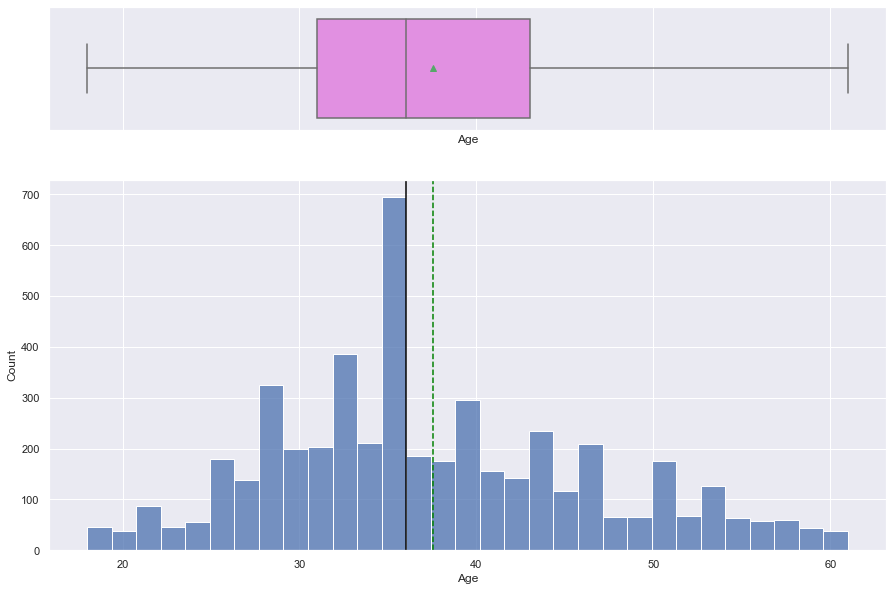

In [273]:
# Run the function to create a boxplot and distplot for Age column
histogram_boxplot(df['Age'])

#### Observations
* Age has a range between around 18 and just over 60
* Age seems to have a normal distribution with the most common age in the dataset being mid-thirties

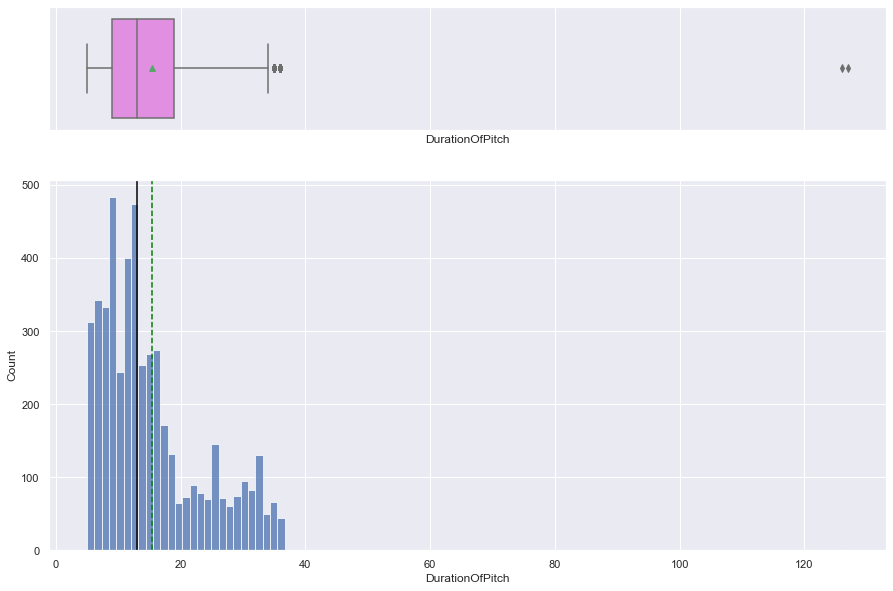

In [274]:
# Run the function to create a boxplot and distplot for DurationOfPitch column
histogram_boxplot(df['DurationOfPitch'])

#### Observations
* Most pitches were 10 to 20 mins long
* There are a couple extreme outliers where the pitch lasted longer than 2 hours... I'm not sure if I should remove these or not, I will test after I create the model

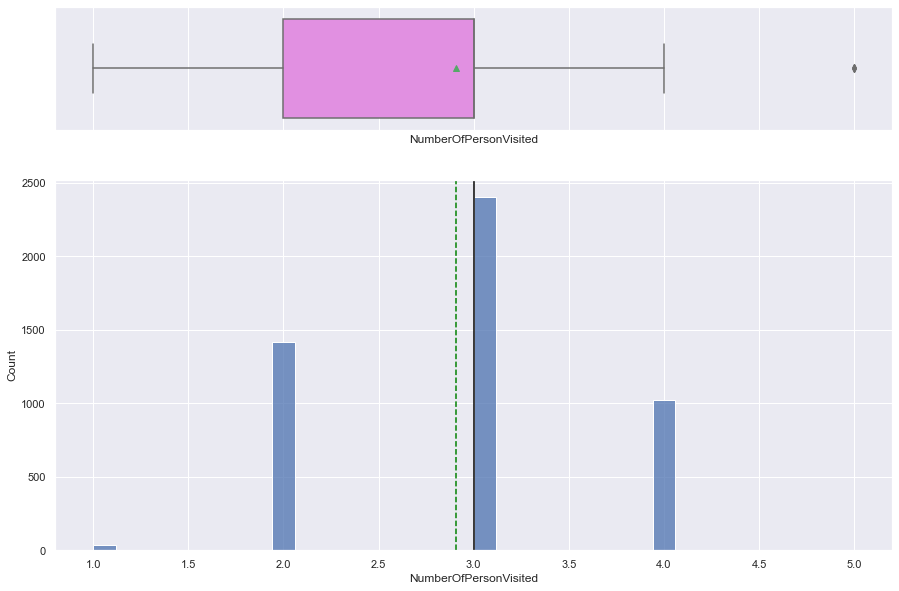

In [275]:
# Run the function to create a boxplot and distplot for NumberOfPersonVisited column
histogram_boxplot(df['NumberOfPersonVisited'])

#### Observations
* Most parties included 3 people. 
* Only a few people traveled alone and a few people were in a group of 5.

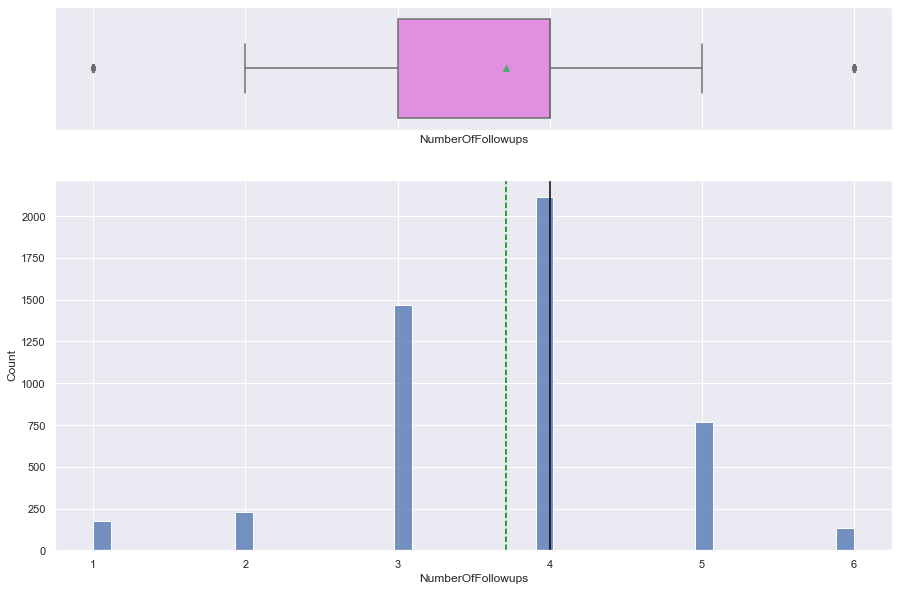

In [276]:
# Run the function to create a boxplot and distplot for NumberOfFollowups column
histogram_boxplot(df['NumberOfFollowups'])

#### Observations
* Most customers received 3 or 4 follow ups
* The range of follow ups is between 1 and 6

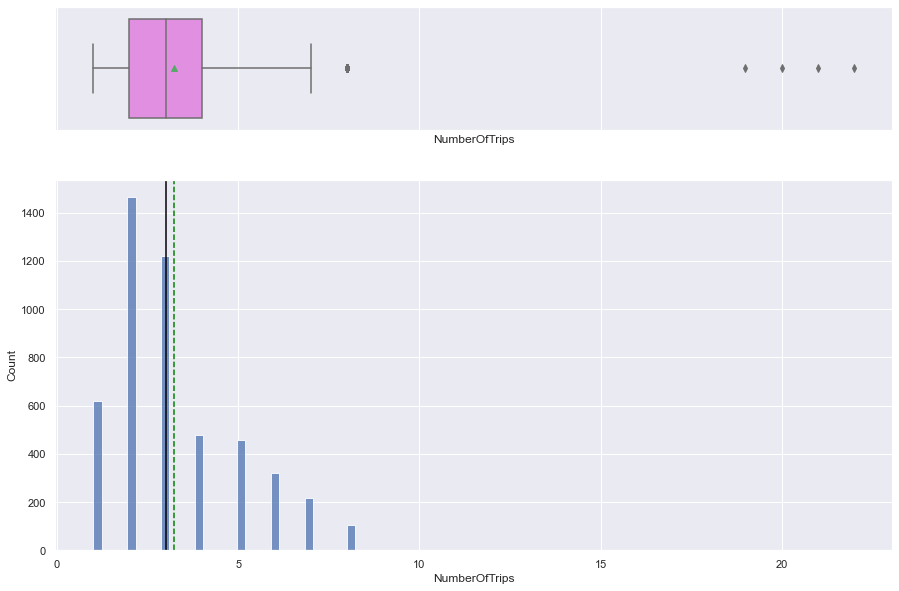

In [277]:
# Run the function to create a boxplot and distplot for NumberOfTrips column
histogram_boxplot(df['NumberOfTrips'])

#### Observations
* Most people take an average of 5 or fewer trips in a year
* There are a few people who take more than 15 trips on average in a year. I'll leave these extremes in because they might be much more likely to take the product offer and I want to see if that shows in the model. 

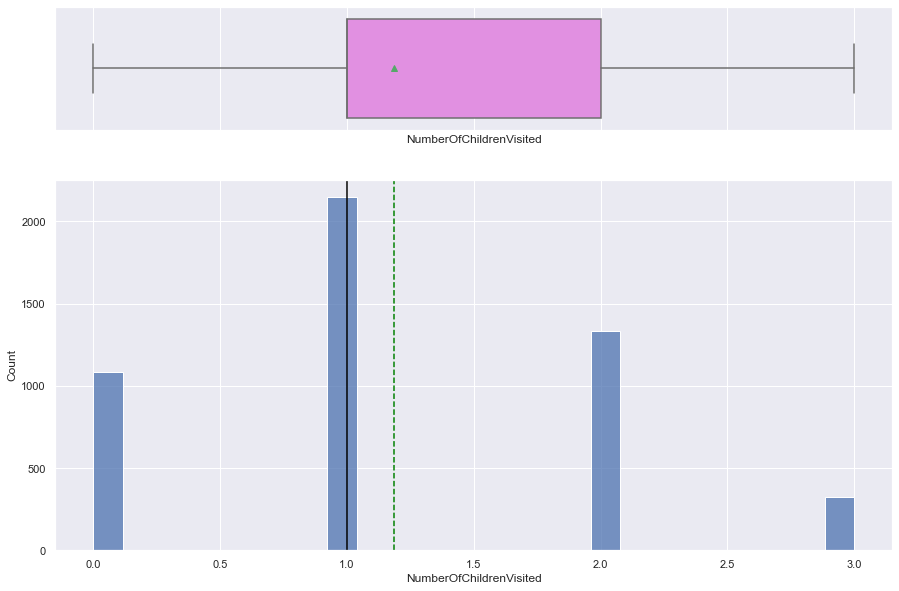

In [278]:
# Run the function to create a boxplot and distplot for NumberOfChildrenVisited column
histogram_boxplot(df['NumberOfChildrenVisited'])

#### Observations
* Most people (around 75%) traveled with at least 1 child under 5
* Of those who brought children under 5, most only brought 1 

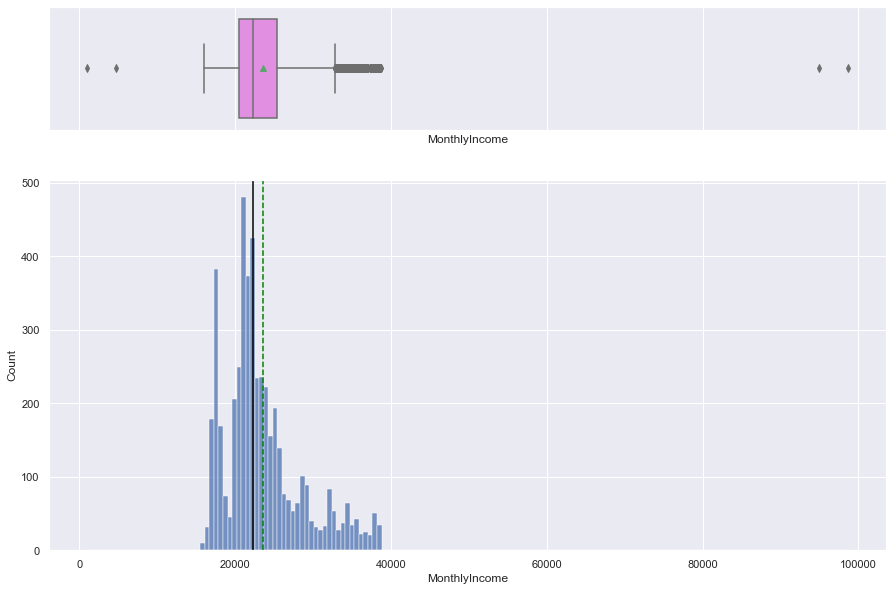

In [279]:
# Run the function to create a boxplot and distplot for Age column
histogram_boxplot(df['MonthlyIncome'])

#### Observations
* There is a wide range of monthly income in the data, but most are between 15,000 and 30,000 with some extreme outliers above and below
* I'm choosing to leave the outliers in the data because they might be important to why someone accepts the product offer

### Univariate Analysis: Categories

In [280]:
# Using an example from the Bike Sharing case study to create a function...
# that will create barplots annotated with percentages for each category column

def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,7)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percentage on top of each bar
        
    plt.show() # show the plot

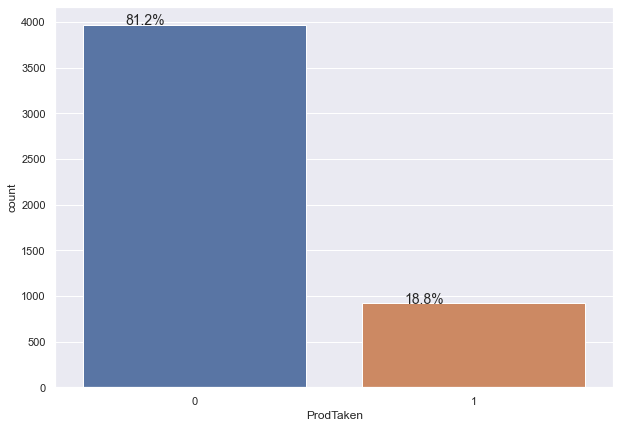

In [281]:
perc_on_bar(df['ProdTaken'])

#### Observations
* Most people did not take the product offer
* 18.8% took the product offer, just under 1,000 people

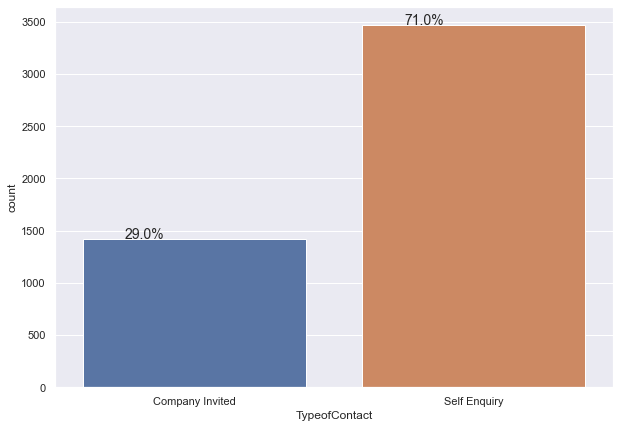

In [282]:
perc_on_bar(df['TypeofContact'])

#### Observations
* Most people, 71%, enquired about the product on their own

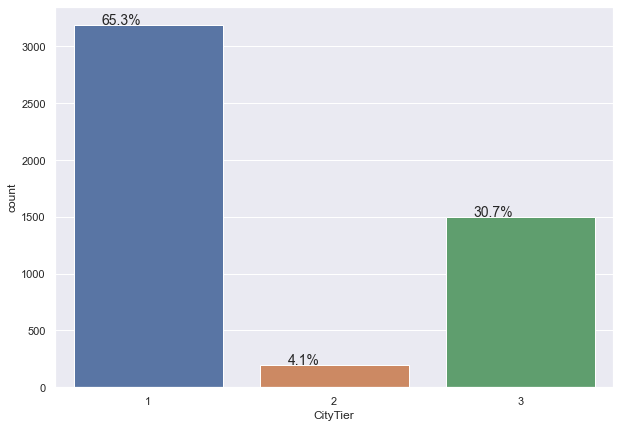

In [283]:
perc_on_bar(df['CityTier'])

#### Observations
* Most customers, ~65%, belong to City Tier 1
* Few, ~4%, belong to City Tier 2
* The data dictionary does not define what these city tiers mean, so it is difficult to derive insights from this information

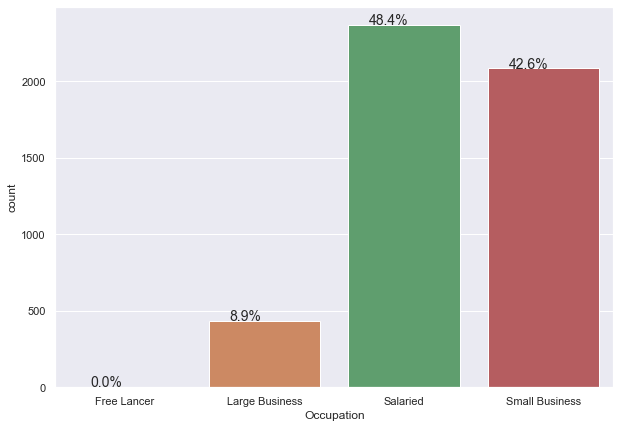

In [284]:
perc_on_bar(df['Occupation'])

#### Observations
* Very few customers are freelancers
* Most customers are either Salaried or Small Business

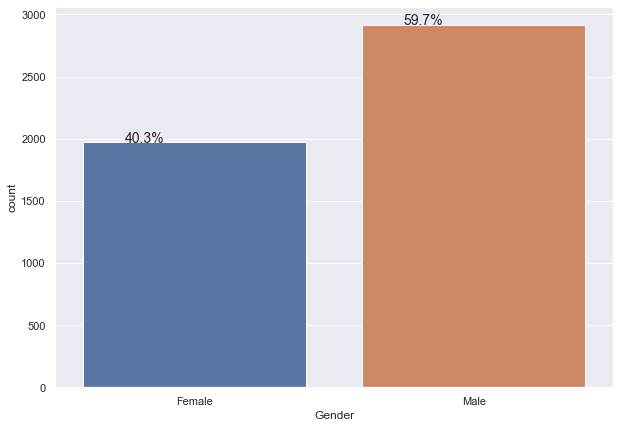

In [285]:
perc_on_bar(df['Gender'])

#### Observations
* More customers are male, but the difference is not extreme (about a 60/40 split)

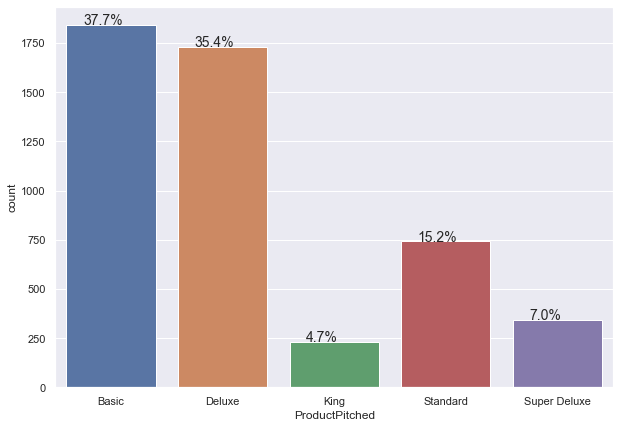

In [286]:
perc_on_bar(df['ProductPitched'])

#### Observations
* Most customers were pitched Basic or Deluxe
* Fewer than 5% of customers were pitched the King package
* It appears that customers were only pitched 1 package based on this data

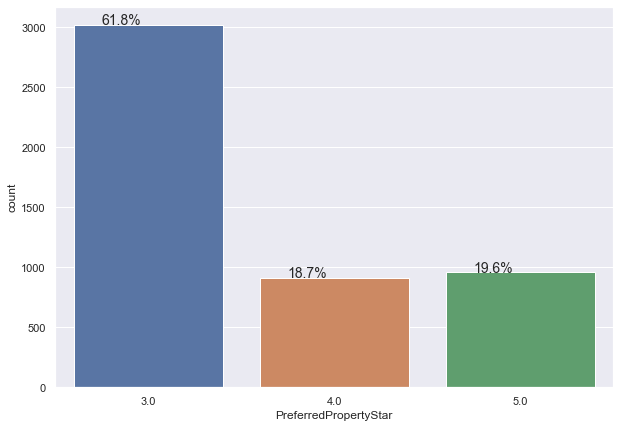

In [287]:
perc_on_bar(df['PreferredPropertyStar'])

#### Observations
* Most customers prefer 3 star properities
* The rest are split near equally between 4 and 5 star properties 

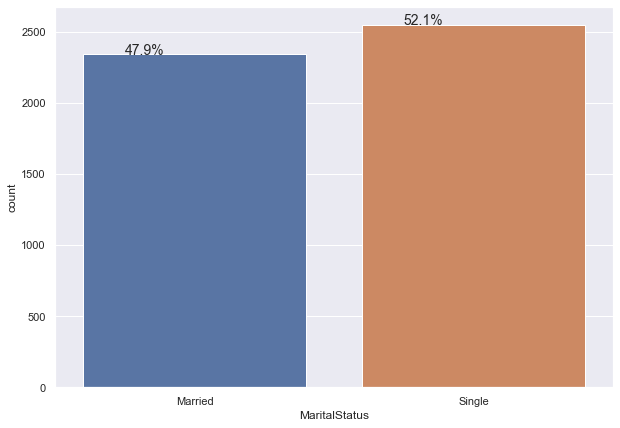

In [288]:
perc_on_bar(df['MaritalStatus'])

#### Observations
* There are slightly more single customers than married in this data set

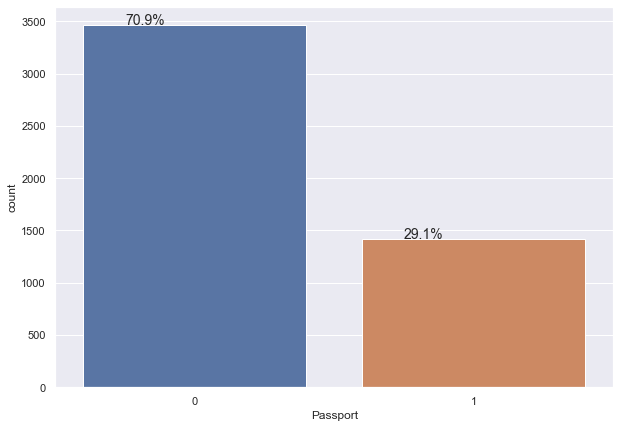

In [289]:
perc_on_bar(df['Passport'])

#### Observations
* Most customers (almost 71%) in this data set do not have a passport

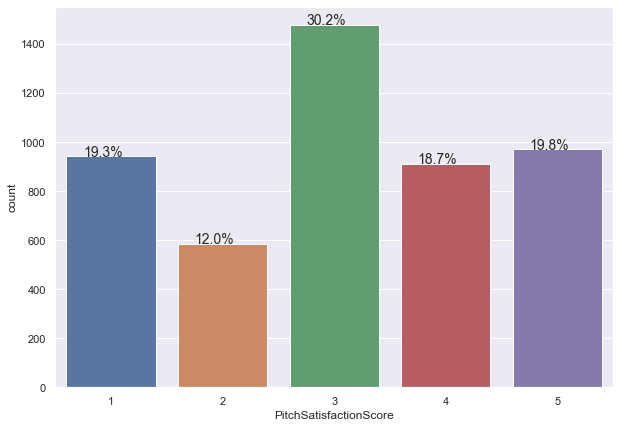

In [290]:
perc_on_bar(df['PitchSatisfactionScore'])

#### Observations
* Most customers rated their satisfaction with the pitch as 3 or higher
* Over 32% of customers rated their satisfaction as 1 or 2, which might indicated a higher than expected dissatisfaction rate

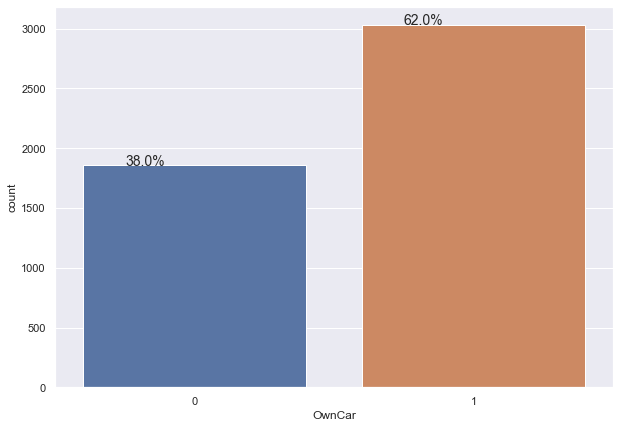

In [291]:
perc_on_bar(df['OwnCar'])

#### Observations
* Most customers (62%) own a car

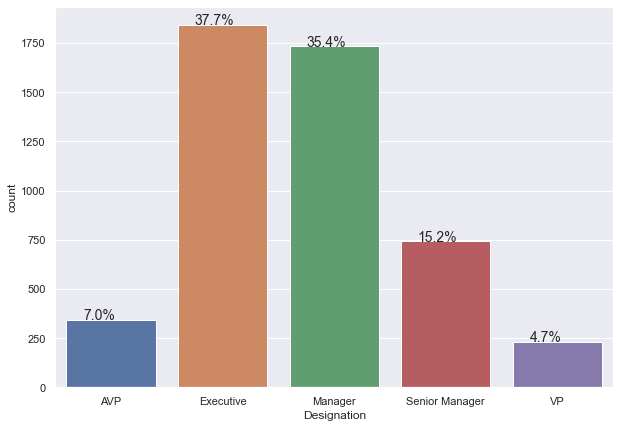

In [292]:
perc_on_bar(df['Designation'])

#### Observations
* Most customers are an Executive or Manager (over 70% combined) 
* Few customers are AVP or VP (less than 12% combined) 

### Bivariate Analysis: Numeric Features

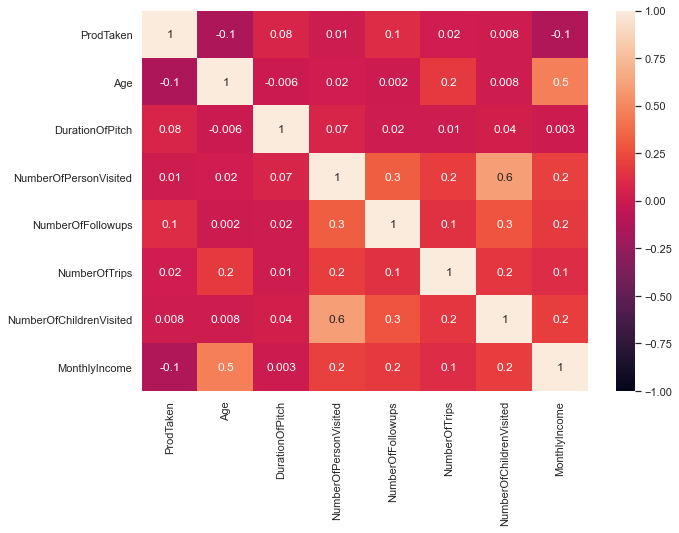

In [293]:
# Create a correlation heatmap to check for highly correlated features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

#### Observations
* No features have a correlation > 0.7, so I am not considering any to have a strong correlation
* Number of people visited and number of children visited have the highest correlation, but it's stil only 0.6
* Age and Monthly Income also have a higher than average correlation, but it's only 0.5 so not considered strong

In [294]:
# Create a df with just the numeric columns
dfNums = df[['ProdTaken', 'Age', 'DurationOfPitch', 'NumberOfPersonVisited', 'NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisited', 'MonthlyIncome']]
dfNums.head()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisited,MonthlyIncome
0,1,41.0,6.0,3,3.0,1.0,0.0,20993.0
1,0,49.0,14.0,3,4.0,2.0,2.0,20130.0
2,1,37.0,8.0,3,4.0,7.0,0.0,17090.0
3,0,33.0,9.0,2,3.0,2.0,1.0,17909.0
4,0,36.0,8.0,2,3.0,1.0,0.0,18468.0


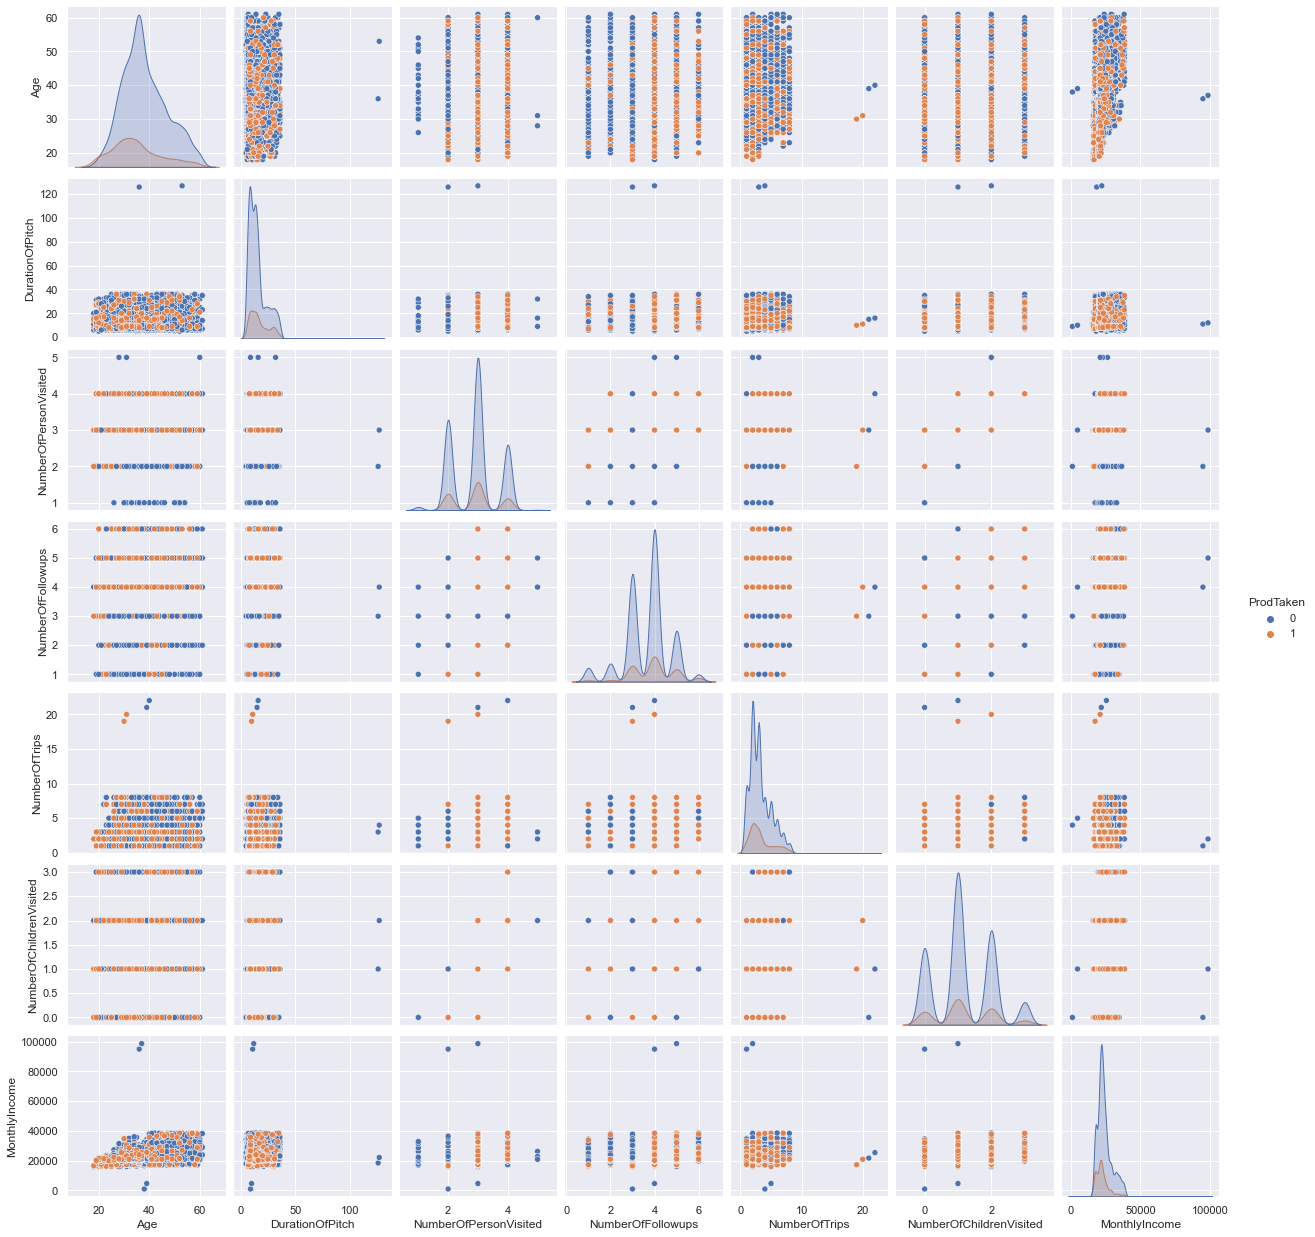

In [295]:
sns.pairplot(dfNums,hue='ProdTaken')
plt.show()

#### Observations
* I don't see any large differences between who took the offer and who didn't while looking at the numeric columns through this pairplot 
* It appears that outliers in each column typically did not take the offer

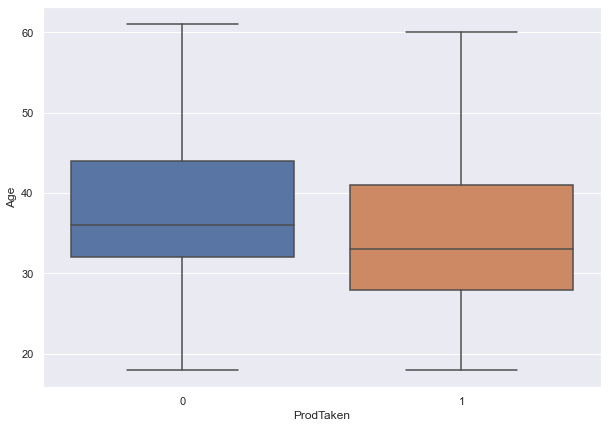

In [296]:
# Compare whether the customer took the product with the customer's age
sns.boxplot(x=df['ProdTaken'],y=df['Age'],data=df);

#### Observations
* Customers who take the package offer tend to be slightly younger than those who do not

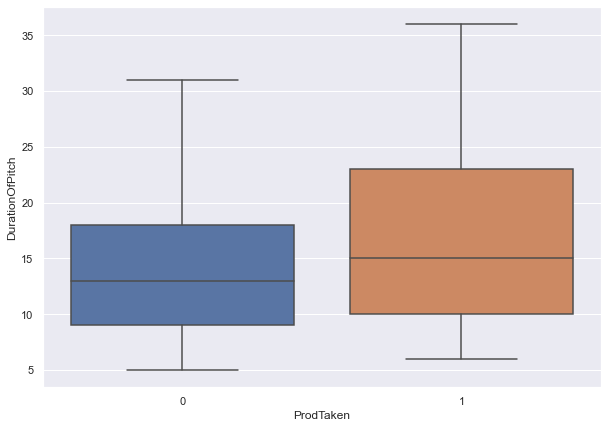

In [297]:
# Compare whether the customer took the product with duration of pitch
sns.boxplot(x=df['ProdTaken'],y=df['DurationOfPitch'],data=df, showfliers=False); # Hiding outliers to make it easier to read

#### Observations
* Customers who took the package tend to have had a slightly longer pitch

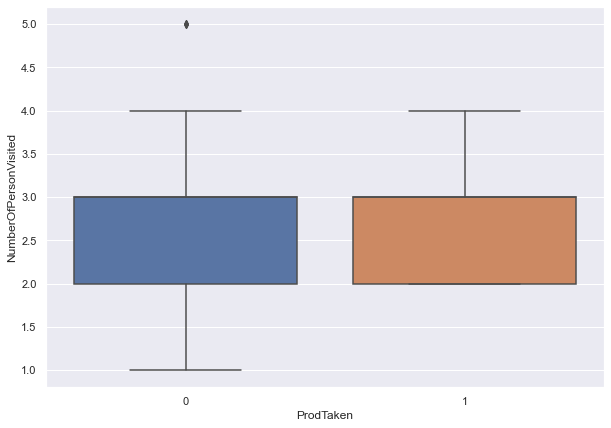

In [298]:
# Compare whether the customer took the product with the number of people who visited together
sns.boxplot(x=df['ProdTaken'],y=df['NumberOfPersonVisited'],data=df);

#### Observations
* Everyone who accepted the package travelled with at least 1 other person (no one who was solo accepted)
* No one who was travelling with more than 4 people accepted the package

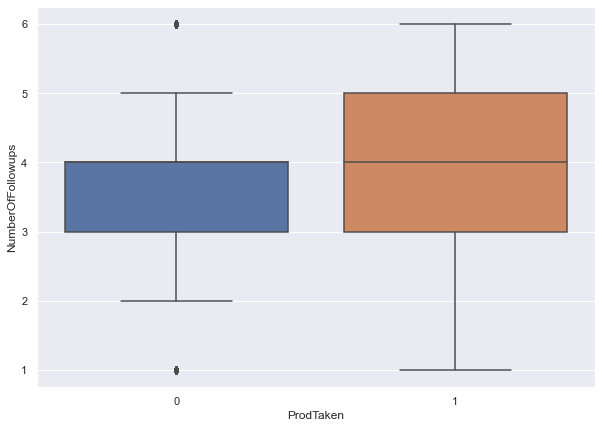

In [299]:
# Compare whether the customer took the product with the number of followups the customer received
sns.boxplot(x=df['ProdTaken'],y=df['NumberOfFollowups'],data=df);

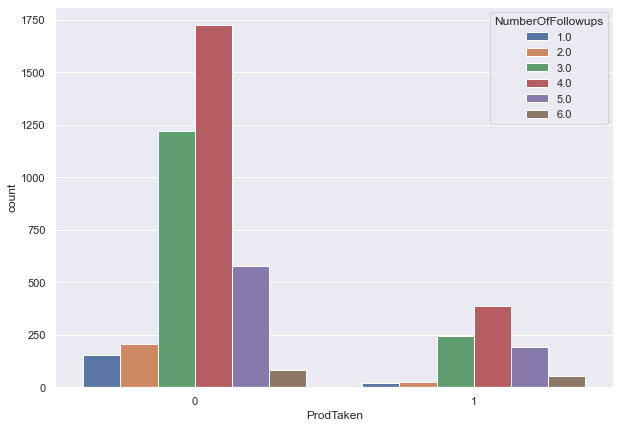

In [300]:
# Look at the data a little differently using a countplot and hue
sns.countplot(x=df['ProdTaken'],hue=df['NumberOfFollowups'],data=df);

#### Observations
* There does not appear to be a significant difference in those who did and did not accept the package when it comes to the number of follow ups
* The only valuable insight seems to be that most people who accepted the package had 3 to 5 follow ups

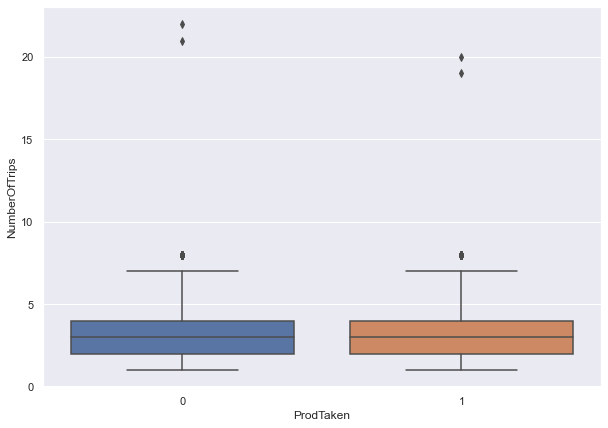

In [301]:
# Compare whether the customer took the product with the average number of trips in a year
sns.boxplot(x=df['ProdTaken'],y=df['NumberOfTrips'],data=df);

#### Observations
* No significant difference in regards to average number of trips in a year, including outliers

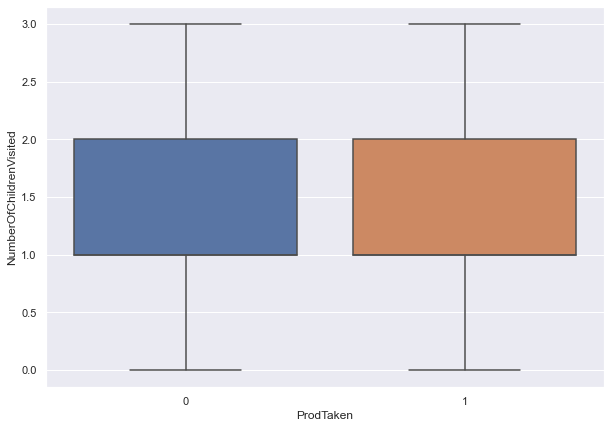

In [302]:
# Compare whether the customer took the product with the number of children under 5 who visited
sns.boxplot(x=df['ProdTaken'],y=df['NumberOfChildrenVisited'],data=df);

#### Observations
* No significant difference in regards to number of children under 5 included
* Will consider dropping this column because of this observation and the correlation with number of people visited

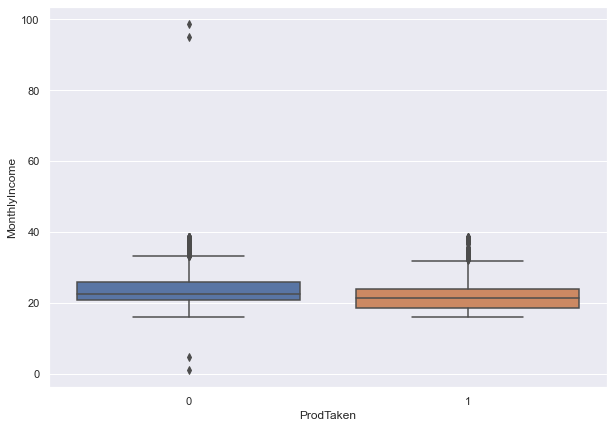

In [337]:
# Compare whether the customer took the product with monthly income  
sns.boxplot(x=df['ProdTaken'],y=df['MonthlyIncome'],data=df);

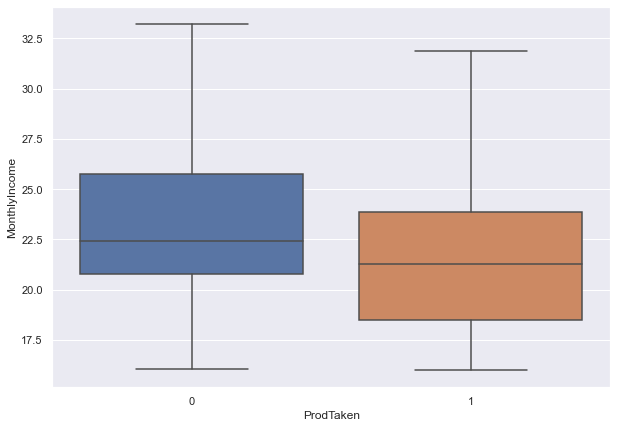

In [338]:
sns.boxplot(x=df['ProdTaken'],y=df['MonthlyIncome'],data=df, showfliers=False); # Hiding outliers to make it easier to read

#### Observations
* Customers who accepted the package tend to have slightly lower income on average

### Bivariate Analysis: Categories

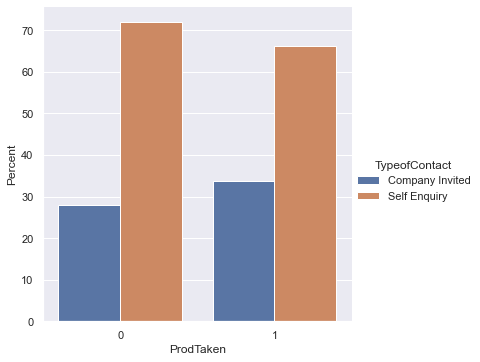

In [304]:
x = 'ProdTaken'
y = 'TypeofContact'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* People who received a company invitation accepted at a slightly higher rate than people who self enquired

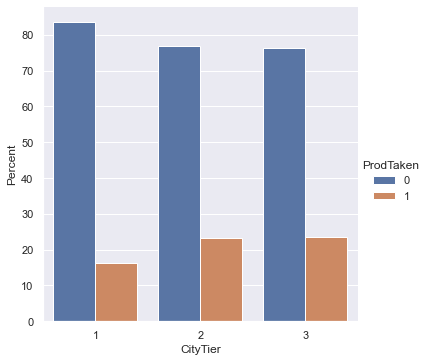

In [305]:
x = 'CityTier'
y = 'ProdTaken'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* People in City Tiers 2 and 3 accepted at a higher rate than City Tier 1

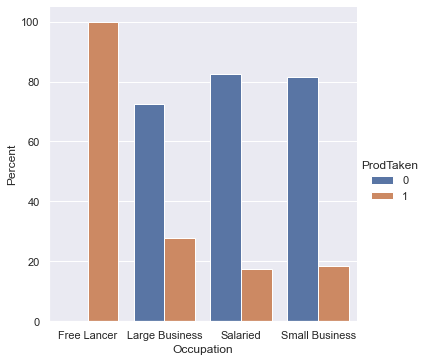

In [306]:
x = 'Occupation'
y = 'ProdTaken'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* All freelancers accepted the package offer (though there were very few of them)
* Large Business employees accepted at a higher rate than Salaried and Small Business

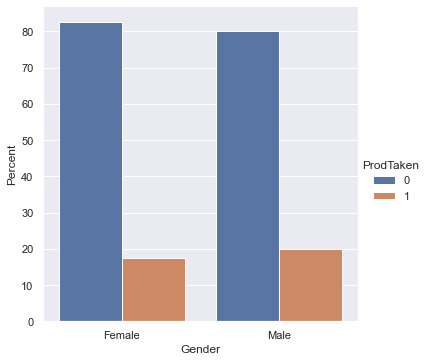

In [307]:
x = 'Gender'
y = 'ProdTaken'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* Men accepted at a slightly higher rate than women, but not significantly

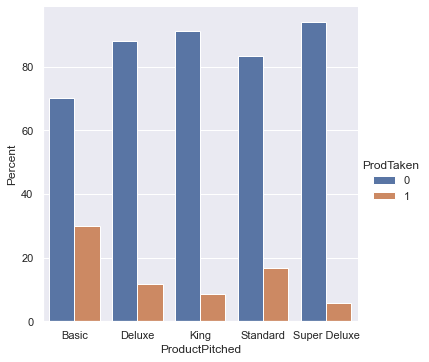

In [308]:
x = 'ProductPitched'
y = 'ProdTaken'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* The Basic package has the highest relative acceptance rate followed by Standard
* The Super Deluxe has the lowest relative acceptance rate

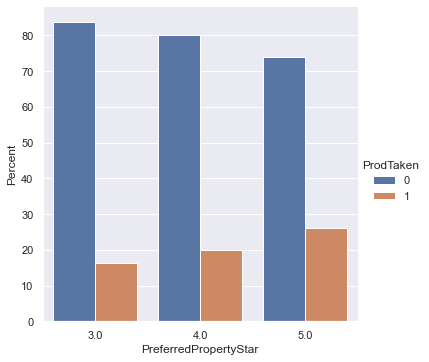

In [309]:
x = 'PreferredPropertyStar'
y = 'ProdTaken'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* The higher the preferred property star, the higher the package acceptance rate

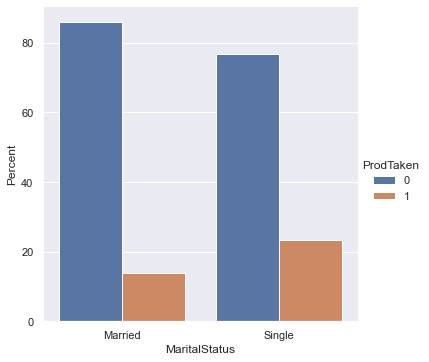

In [310]:
x = 'MaritalStatus'
y = 'ProdTaken'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* Singles had a higher acceptance rate than married people

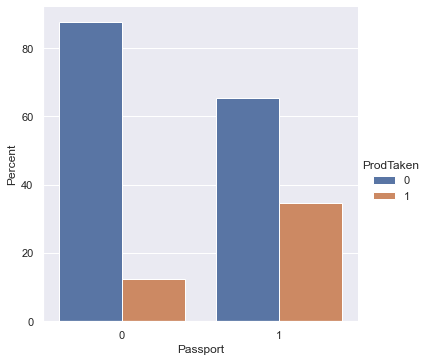

In [311]:
x = 'Passport'
y = 'ProdTaken'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* People with a passport had a much higher package acceptance rate than those without one

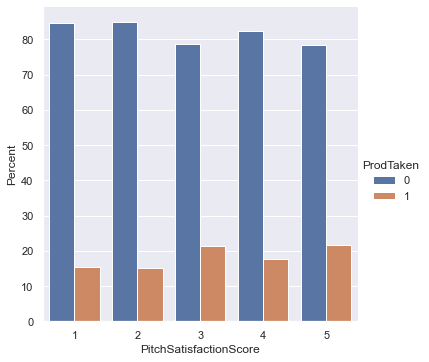

In [312]:
x = 'PitchSatisfactionScore'
y = 'ProdTaken'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* People accepted packages at a similar rate regardless of their pitch satisfaction, though 3 and 5 accepted at the highest rate

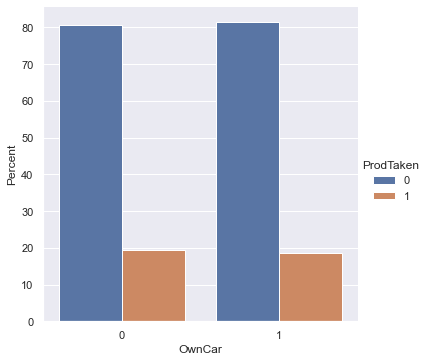

In [313]:
x = 'OwnCar'
y = 'ProdTaken'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* No significant differnece in the package acceptance rate between people who do and do not own a car

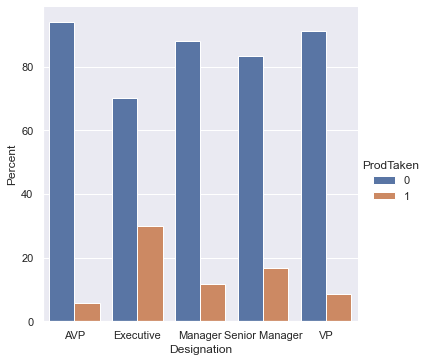

In [314]:
x = 'Designation'
y = 'ProdTaken'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Percent',hue=y,kind='bar'));

#### Observations
* Executives accepted the package at a much higher rate than other designations, followed by Senior Managers
* AVP had the lowest acceptance rate

### Deep Dive on Executive Designation

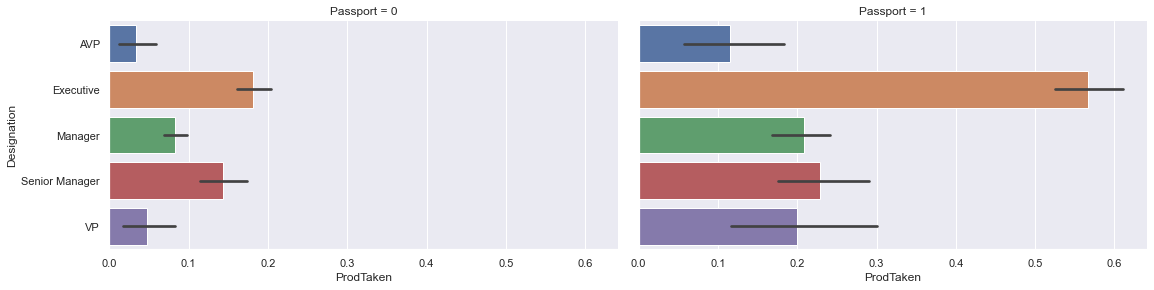

In [315]:
# Compare product acceptance rate by designation and passport

g = sns.catplot(x="ProdTaken", y="Designation", col="Passport",
                data=df,
                kind="bar", height=4, aspect=2)

#### Observations
* Executives with a passport have a much higher acceptance rate than others
* From earlier observations, people with passports had a higher acceptance rate overall

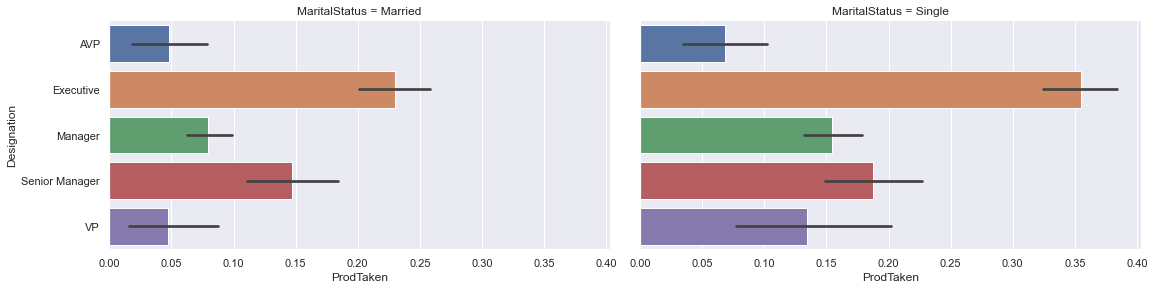

In [316]:
# Compare product acceptance rate by designation and marital status

g = sns.catplot(x="ProdTaken", y="Designation", col="MaritalStatus",
                data=df,
                kind="bar", height=4, aspect=2)

#### Observations
* Single Executives have a much higher acceptance rate than other designations
* Single Executives have a higher acceptance rate than married execs

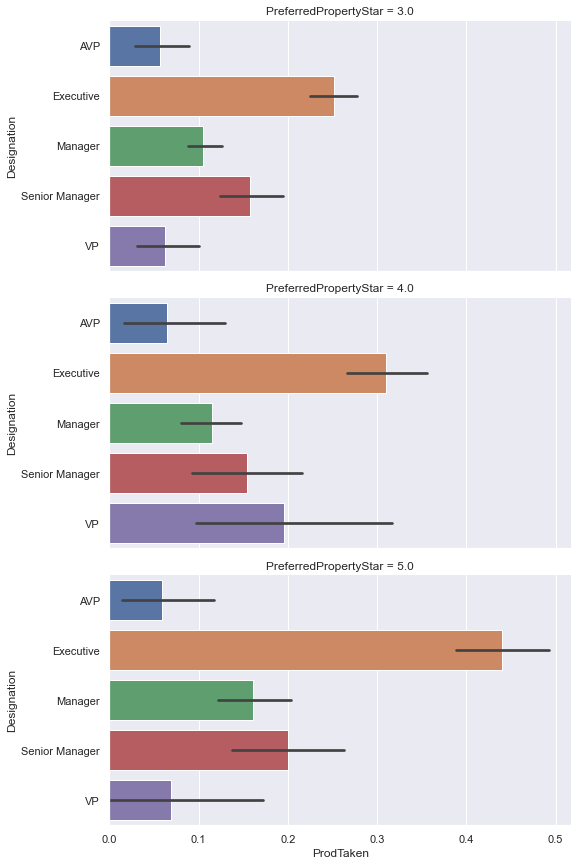

In [317]:
# Compare product acceptance rate by designation and preferred property star

g = sns.catplot(x="ProdTaken", y="Designation", row="PreferredPropertyStar",
                data=df,
                kind="bar", height=4, aspect=2)

#### Observations
* Executives who prefer 5 star properties have the highest executive rate (compared to other designations and property star preferences)

### Compare Product Acceptance Rate by Package and Other Features

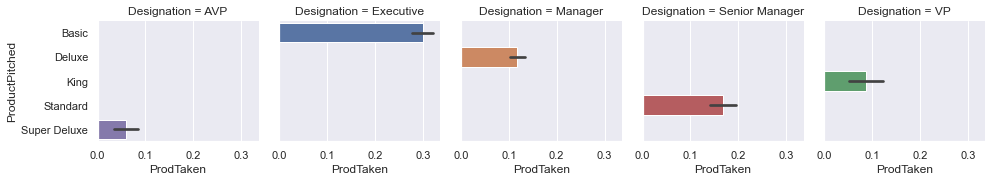

In [318]:
# Compare product acceptance rate by package offered and designation

g = sns.catplot(x="ProdTaken", y="ProductPitched", col="Designation",
                data=df,
                kind="bar", height=2.5, aspect=1.1)

#### Observations
* Interestingly, only one type of package was offered to each designation
* Basic packages had the highest acceptance rate, but it was only offered to executives
* The designation portion of the customer profile for each package will be negatively impacted by this since I can't tell if the designations would have responded differently to other packages because they were only offered one type each

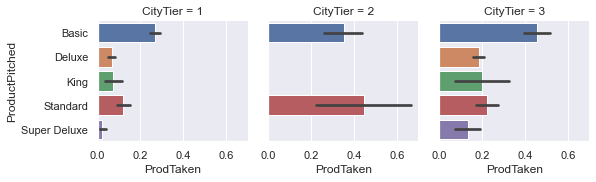

In [319]:
# Compare product acceptance rate by package offered and CityTier

g = sns.catplot(x="ProdTaken", y="ProductPitched", col="CityTier",
                data=df,
                kind="bar", height=2.5, aspect=1.1)

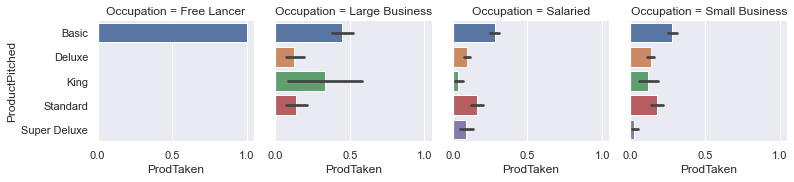

In [320]:
# Compare product acceptance rate by package offered and Occupation

g = sns.catplot(x="ProdTaken", y="ProductPitched", col="Occupation",
                data=df,
                kind="bar", height=2.5, aspect=1.1)

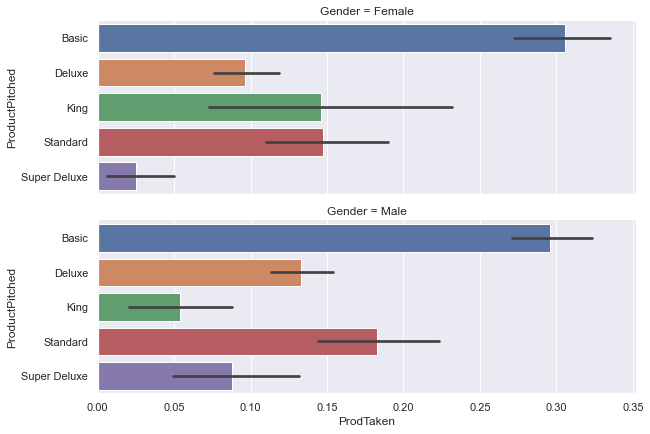

In [321]:
# Compare product acceptance rate by package offered and gender

g = sns.catplot(x="ProdTaken", y="ProductPitched", row="Gender",
                data=df,
                kind="bar", height=3, aspect=3)

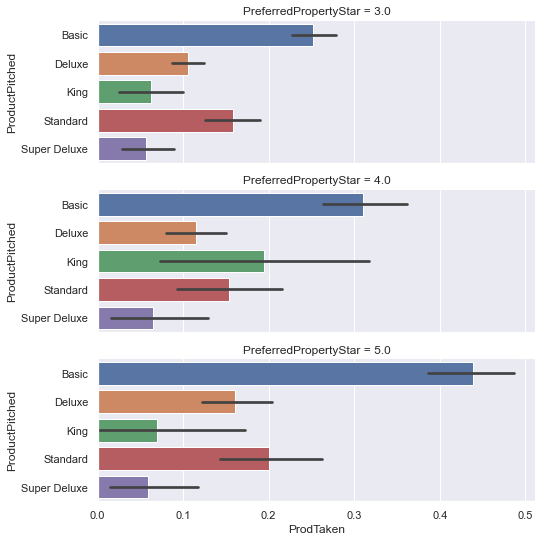

In [322]:
# Compare product acceptance rate by package offered and preferred property star

g = sns.catplot(x="ProdTaken", y="ProductPitched", row="PreferredPropertyStar",
                data=df,
                kind="bar", height=2.5, aspect=3)

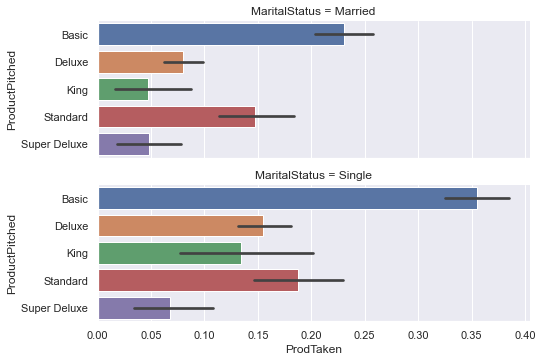

In [323]:
# Compare product acceptance rate by package offered and marital status

g = sns.catplot(x="ProdTaken", y="ProductPitched", row="MaritalStatus",
                data=df,
                kind="bar", height=2.5, aspect=3)

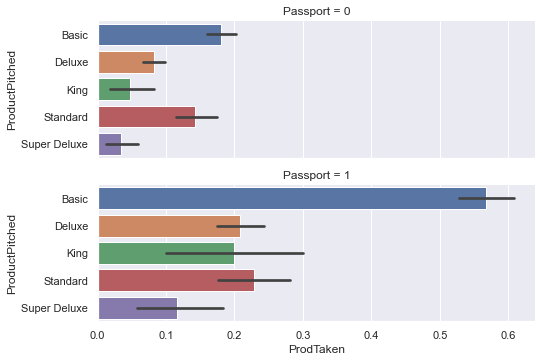

In [324]:
# Compare product acceptance rate by package offered and passport

g = sns.catplot(x="ProdTaken", y="ProductPitched", row="Passport",
                data=df,
                kind="bar", height=2.5, aspect=3)

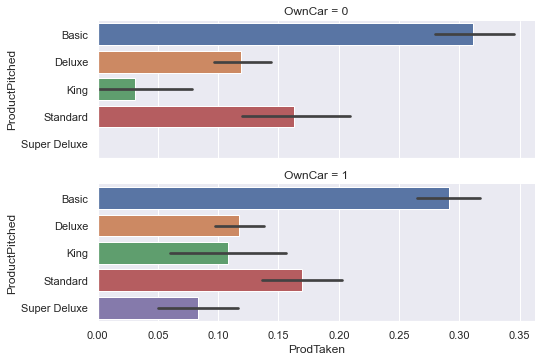

In [325]:
# Compare product acceptance rate by package offered and whether they own a car

g = sns.catplot(x="ProdTaken", y="ProductPitched", row="OwnCar",
                data=df,
                kind="bar", height=2.5, aspect=3)

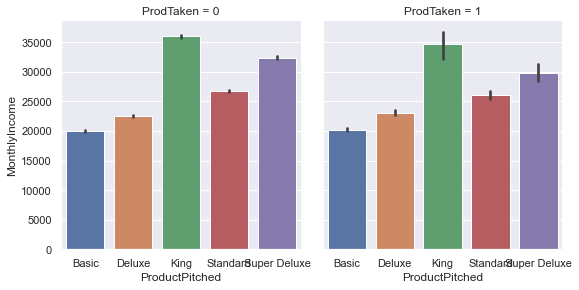

In [326]:
# Look at average monthly income by package offered and hue by ProdTaken

g = sns.catplot(x="ProductPitched", y="MonthlyIncome", col="ProdTaken",
                data=df,
                kind="bar", height=4, aspect=1)

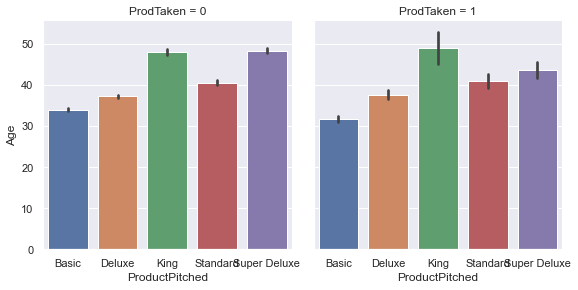

In [327]:
# Look at age income by package offered and hue by ProdTaken

g = sns.catplot(x="ProductPitched", y="Age", col="ProdTaken",
                data=df,
                kind="bar", height=4, aspect=1)

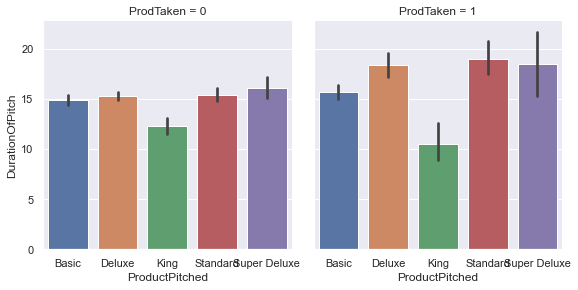

In [328]:
# Look at average duration of pitch by package offered and hue by ProdTaken

g = sns.catplot(x="ProductPitched", y="DurationOfPitch", col="ProdTaken",
                data=df,
                kind="bar", height=4, aspect=1)

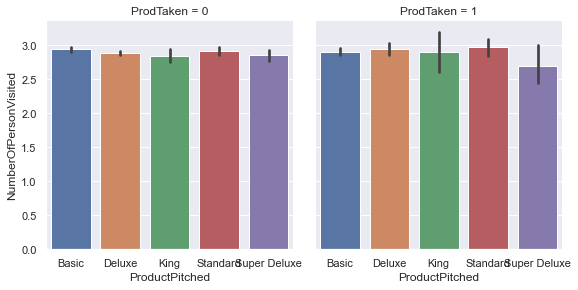

In [329]:
# Look at average number of persons visited by package offered and hue by ProdTaken

g = sns.catplot(x="ProductPitched", y="NumberOfPersonVisited", col="ProdTaken",
                data=df,
                kind="bar", height=4, aspect=1)

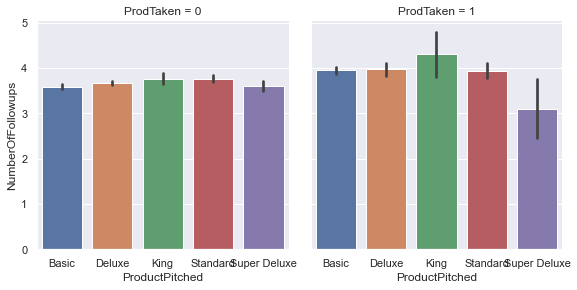

In [330]:
# Look at average number of followups by package offered and hue by ProdTaken

g = sns.catplot(x="ProductPitched", y="NumberOfFollowups", col="ProdTaken",
                data=df,
                kind="bar", height=4, aspect=1)

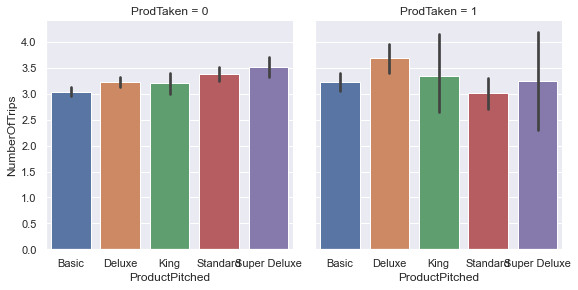

In [331]:
# Look at average number of trips by package offered and hue by ProdTaken

g = sns.catplot(x="ProductPitched", y="NumberOfTrips", col="ProdTaken",
                data=df,
                kind="bar", height=4, aspect=1)

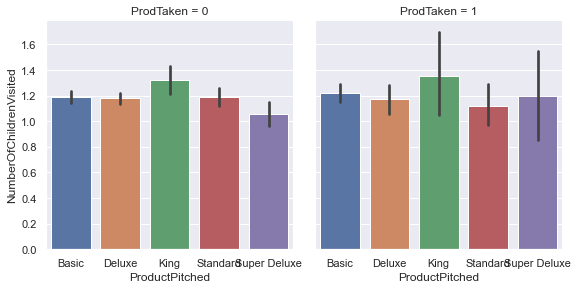

In [332]:
# Look at average number of children under 5 visited by package offered and hue by ProdTaken

g = sns.catplot(x="ProductPitched", y="NumberOfChildrenVisited", col="ProdTaken",
                data=df,
                kind="bar", height=4, aspect=1)

#### Observations
* Each product was only offered to one designation time (mutually exclusive) as noted above. 
* City Tier 3 had the highest acceptance rate for all packages, especially Basic
* Product acceptance rate varied by package for each gender:
    - Basic: Similar for both genders
    - Deluxe: Higher acceptance rate from males 
    - King: Higher acceptance rate from FEMALES
    - Standard: Higher acceptance rate from males
    - Super Deluxe: Higher acceptance rate from males
* All packages had a higher acceptance rate with 5 stars as the preferred property start except King. It had a higher acceptance rate among people who preferred 4 stars. 
* Singles and people with a passport had a higher acceptance rate across all package types
* Numeric columns had much less variance between those who accepted and those who did not by package type. Variance that exists between package types is largely the same between those who did and did not accept the package. I don't see any meaningful differences in numeric features to call out that would be significant for a customer profile by package. 

### Customer Profile
On average, customers who accepted the package offer are more likely to be:
* Male (slightly more likely)
* Single
* Younger (30s)
* Have a passport
* Travelling with at least 1 companion
* Prefer a 5 star property
* Executive
* City Tier 2 or 3
* Slightly lower monthly income (18,000 to 24,000 per month)
* Have receive a slightly longer sales pitch
* Have received slight more offers (4 is most common)


<a href = #TOC>Back to Top</a>

# <a id = "link3"></a>3. Insights from EDA
Key meaningful observations on individual variables and the relationship between variables

I detailed a lot of my observations above, but in summary:
* People with a Passport accepted the package offers at a much higher rate than those withought one. 
* There is an odd relationship between Designation and ProductPitched in this data. Each designation was offered only one package type -- Executives were all offered the Basic package, for example, and no other designations were offered the Basic package. This makes it hard to know whether people in those designations would have accepted the other packages at the same rate or not. 
* Owning a car doesn't seem to make a difference except for the King and Super Deluxe packages, where car owners accepted at a much higher rate. 
* Single (unmarried) people accepted the packages at a significantly higher rate regardless of package type. 
* City Tier 3 had the highest acceptance rate, followed by City Tier 2 
* Preferred Property Star 5 had the highest acceptance rate, followe by Preferred Property Star 4
* Everyone who accepted the package was travelling with at least 1 companion
* Those who accepted the package had a lower average income

From the EDA, some features seem to support a logical assumption that more affluent customers would accept an extra package offer (higher City Tier, higher preferred property star, car ownership, passport holders). However, the monthly income is lower on average for those who accepted, so the logic doesn't work out completely. Travelling with companions might be a key factor since everyone who accepted had at least 1 companion.  

<a href = #TOC>Back to Top</a>

# <a id = "link4"></a>4. Data Pre-Processing
Prepare the data for analysis - Missing value Treatment, Outlier Detection (treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling

### Additional Columns to Drop Based on EDA
I already dropped a couple columns earlier, and now I'm choosing to drop two more: 
* NumberOfChildrenVisited doesn't seem to have a significant difference and it has a moderate correlation to number of persons visited, so I'm going to drop the number of children visited column. 
* Occupation seems to be a problematic column because it has mixed data in it. Freelancer and Salaried make sense together, but they don't make sense with Large Business and Small Business (though those two would make sense together). Because the data is not consistent in this column, I think it is likely inaccurate and so I'm choosing to drop the column. 

In [333]:
df.drop('NumberOfChildrenVisited', axis=1, inplace=True)
df.drop('Occupation', axis=1, inplace=True)

### Missing Values
* I already addressed null/missing values earlier in the workbook: <a href = #NullValues>Replace Null Values</a>

### Correct the Magnitude Issue with MonthlyIncome
* Monthly income is in the thousands, which is much larger than the data in the other columns. This could throw off some of the models, so I'm going to scale it down. 

In [336]:
df['MonthlyIncome'] = df['MonthlyIncome'].div(1000)

df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20.993
1,0,49.0,Company Invited,1,14.0,Male,3,4.0,Deluxe,4.0,Single,2.0,0,3,1,Manager,20.130
2,1,37.0,Self Enquiry,1,8.0,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17.090
3,0,33.0,Company Invited,1,9.0,Female,2,3.0,Basic,3.0,Single,2.0,1,5,1,Executive,17.909
4,0,36.0,Self Enquiry,1,8.0,Male,2,3.0,Basic,4.0,Single,1.0,0,5,1,Executive,18.468


### Outliers
I noted in the observations above that there are some outliers. In summary: 
* DurationOfPitch -- Most are under 40 minutes, but there are a few over 120. Although 120 minutes is long, it's still within reason for a lengthy conversation, so I'm choosing to keep these outliers in case they are significant for the model and because I don't think they are data entry errors. 
* NumberOfPersonVisited -- Most are 1 to 4, but there are a few who travelled as a group of 5. Since 5 is only 1 person more than the 4th quartile, I'm going to keep these outliers. It is reasonable that there were some groups of 5, even if rare. 
* NumberOfFollowups -- Most are between 2 and 5 follow ups. The outliers are 1 and 6, which are reasonable and only 1 outside the quartiles, so I'm going to keep these outliers. 
* NumberOfTrips -- Most are under 10, but there are a few over 18. Although not common, it is within reason that some customers travelled 20 times per year, so I will also keep these outliers. 
* MonthlyIncome -- The normal range is roughly between 15,000 and 40,000. There are a few outliers below 10,000 and a few over 90,000. These extreme outliers all did not accept the package. Since there could be some reason why monthly income affects a customer's choice to accept or reject the package offer, I'm going to keep the outliers. 

### Get Dummies

In [340]:
# Splitting categorical columns and assigning dummies values
modelData = pd.get_dummies(df)

modelData.head()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,NumberOfTrips,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,CityTier_1,...,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,OwnCar_0,OwnCar_1,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,6.0,3,3.0,1.0,20.993,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,0,49.0,14.0,3,4.0,2.0,20.130,1,0,1,...,1,0,0,0,1,0,0,1,0,0
2,1,37.0,8.0,3,4.0,7.0,17.090,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,33.0,9.0,2,3.0,2.0,17.909,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,36.0,8.0,2,3.0,1.0,18.468,0,1,1,...,0,0,1,0,1,0,1,0,0,0


In [341]:
modelData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProdTaken                      4888 non-null   int64  
 1   Age                            4888 non-null   float64
 2   DurationOfPitch                4888 non-null   float64
 3   NumberOfPersonVisited          4888 non-null   int64  
 4   NumberOfFollowups              4888 non-null   float64
 5   NumberOfTrips                  4888 non-null   float64
 6   MonthlyIncome                  4888 non-null   float64
 7   TypeofContact_Company Invited  4888 non-null   uint8  
 8   TypeofContact_Self Enquiry     4888 non-null   uint8  
 9   CityTier_1                     4888 non-null   uint8  
 10  CityTier_2                     4888 non-null   uint8  
 11  CityTier_3                     4888 non-null   uint8  
 12  Gender_Female                  4888 non-null   u

### Split Data in Train and Test Sets

In [343]:
# Split the features into X and y, with y as the target column 
X = modelData.drop("ProdTaken", axis=1)
y = modelData["ProdTaken"]

In [344]:
# Split the data into training and test sets
# Using 70/30 split for train/test size
# Set stratify parameter to y because of the imbalance in the ProdTaken data (~ 90/10)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [346]:
# Check the distribution of the original model data for the target variable
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [347]:
# Compare withe the distribution of the test model data for the target variable to make sure it's similarly distributed
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

### Define functions for metric scores and confusion matrix

In [411]:
# Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [349]:
# Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<a href = #TOC>Back to Top</a>

# <a id = "link5"></a>5. Model Building: Bagging
Build bagging classifier, random forest, and decision tree.

## Important Metric
Because my main goal is to identify which customers will take the product offer of the new wellness package, I'm going to focus on Recall as my primary metric but seek for a good balance with Precision. 

My logic is that each FN represents a customer that would have purchased the package, but we did not offer it to them, which means lost revenue. FP are likely less costly because they represent time spent on a sales pitch or marketing effort to a customer that won't take the offer. 

However, if the model predicts ALL customers will take the package offer, I would get 100% Recall, but my Precision would be really bad. Therefore, I need to have some balance between the two while favoring Recall to minimize missed revenue, so I'm going to include F1 scores in my metrics and seek to have a high F1 score, too.   

## Decision Tree Classifier

In [350]:
# Create the decision tree classifier
dTree = DecisionTreeClassifier(criterion='gini',random_state=1)

In [351]:
# Fit the training data to the decision tree
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

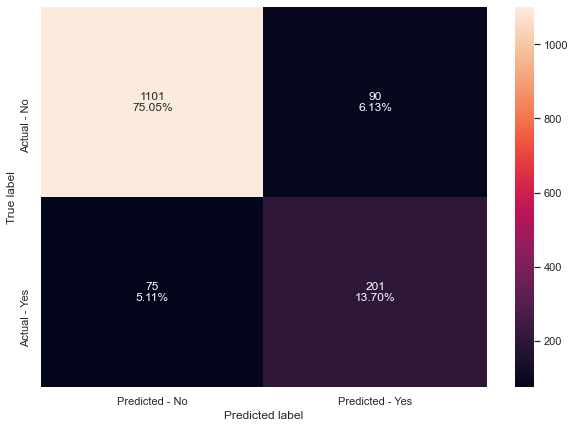

In [352]:
# Generate a confusion matrix to check performance of the decision tree
make_confusion_matrix(dTree,y_test)

In [412]:
# Check performance metrics of the decision tree
dTree_estimator_score=get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8875255623721882
Recall on training set :  1.0
Recall on test set :  0.7282608695652174
Precision on training set :  1.0
Precision on test set :  0.6907216494845361
F1 Score on training set :  1.0
F1 Score on test set :  0.7089947089947088


#### Observations
* Decision tree performed OK, but is overfitting the training data (as expected)
* Precision is lower than recall, so there's room for improvement since my goal is to maximize precision. 

## Bagging Classifier

In [354]:
# Create the bagging classifier and fit it to the training data
bagClass = BaggingClassifier(random_state=1)
bagClass.fit(X_train,y_train)

BaggingClassifier(random_state=1)

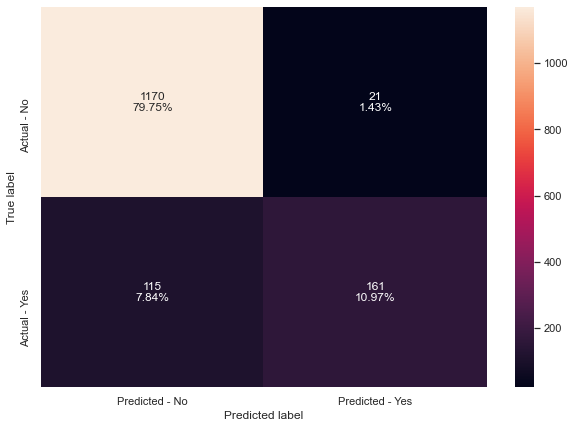

In [356]:
# Generate a confusion matrix to check performance of the bagging classifier
make_confusion_matrix(bagClass,y_test)

In [385]:
# Check performance metrics of the bagging classifier
bagging_estimator_score=get_metrics_score(bagClass)

Accuracy on training set :  0.9938614440222158
Accuracy on test set :  0.907293796864349
Recall on training set :  0.967391304347826
Recall on test set :  0.5833333333333334
Precision on training set :  1.0
Precision on test set :  0.8846153846153846
F1 Score on training set :  0.9834254143646408
F1 Score on test set :  0.7030567685589519


#### Observations
* Also overfitting to the train data
* Better precision score than the decision tree, but a much lower recall score

## Random Forest Classifier

In [357]:
# Create the random forest classifier and fit to the train data
rfClass=RandomForestClassifier(random_state=1)
rfClass.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

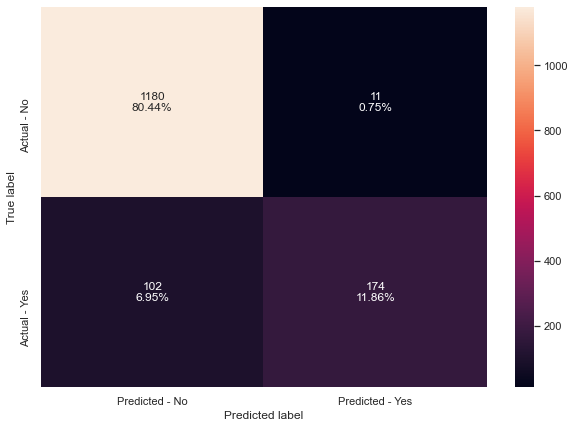

In [358]:
# Generate a confusion matrix to check performance of the random forest classifier
make_confusion_matrix(rfClass,y_test)

In [386]:
# Check performance metrics of the random forest classifier
rf_estimator_score=get_metrics_score(rfClass)

Accuracy on training set :  1.0
Accuracy on test set :  0.9229720518064076
Recall on training set :  1.0
Recall on test set :  0.6304347826086957
Precision on training set :  1.0
Precision on test set :  0.9405405405405406
F1 Score on training set :  1.0
F1 Score on test set :  0.754880694143167


#### Observations
* Also overfitting on the train data (as expected)
* Better performance on precision and recall on the test data

<a href = #TOC>Back to Top</a>

# <a id = "link6"></a>6. Model Performance Improvement: Bagging
Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment

## Hyperparameter Tuning: Decision Tree

In [364]:
# Create a new variable for the tuned decision tree
dTree_tuned = DecisionTreeClassifier(criterion='gini',random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.00001,0.0001,0.001,0.01,0.1]
             }


# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15,
                       min_impurity_decrease=1e-05, min_samples_leaf=5,
                       random_state=1)

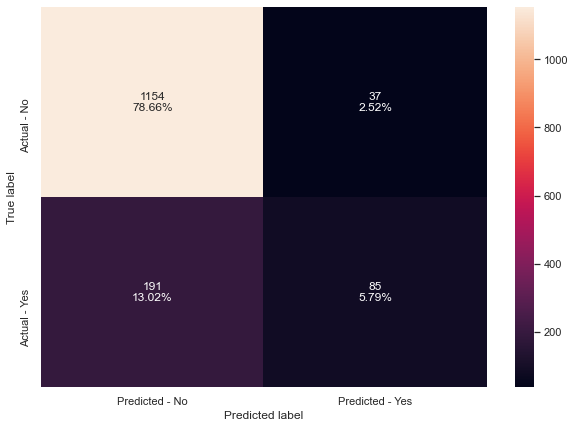

In [365]:
# Generate a confusion matrix to check performance of the tuned decision tree
make_confusion_matrix(dTree_tuned,y_test)

In [387]:
# Check performance metrics of the tuned decision tree
tuned_dTree_estimator_score=get_metrics_score(dTree_tuned)

Accuracy on training set :  0.8450745396083017
Accuracy on test set :  0.8445807770961146
Recall on training set :  0.327639751552795
Recall on test set :  0.3079710144927536
Precision on training set :  0.685064935064935
Precision on test set :  0.6967213114754098
F1 Score on training set :  0.4432773109243697
F1 Score on test set :  0.42713567839195976


#### Observations
* Overfitting has reduced pretty well -- performance on Training and Test are similar
* Performacne on Precision has improved, but decreased on Recall
* The F1 score has decreased 

## Hyperparameter Tuning: Bagging Classifier

In [372]:
# Grid search for bagging classifier
cl1 = DecisionTreeClassifier(criterion='gini', random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, cv = 5,n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]})

In [373]:
## Get the best estimator
bagClass_tuned = grid.best_estimator_
bagClass_tuned.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.8, n_estimators=101, random_state=1)

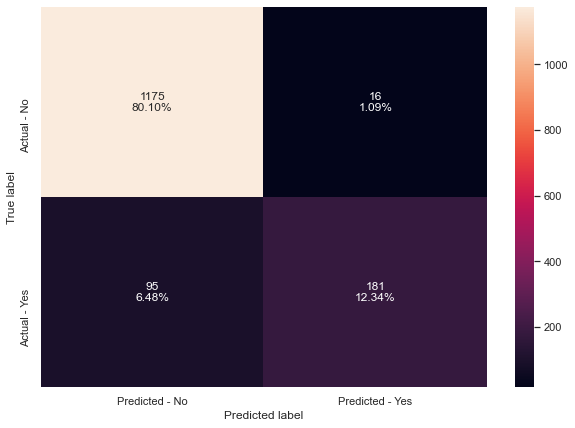

In [374]:
# Create a confusion matrix for the tuned bagging classifer
make_confusion_matrix(bagClass_tuned,y_test)

In [388]:
# Check performance metrics of the tuned bagging classifier
tuned_bagging_estimator_score = get_metrics_score(bagClass_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9243353783231084
Recall on training set :  1.0
Recall on test set :  0.6557971014492754
Precision on training set :  1.0
Precision on test set :  0.9187817258883249
F1 Score on training set :  1.0
F1 Score on test set :  0.7653276955602536


#### Observations
* Still seems to be overfitting the training data
* Precision and Recall on test data have both improved
* F1 score has improved

## Hyperparameter Tuning: Random Forest

In [376]:
# Choose the type of classifier. 
rfClass_tuned = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

# Grid of parameters to choose from
parameters = {  
                'max_features': ['sqrt','log2','auto'],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': list(np.linspace(10, 50, 10, dtype = int))}


# Run the grid search
grid_obj = GridSearchCV(rfClass_tuned, parameters,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfClass_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rfClass_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=23, oob_score=True,
                       random_state=1)

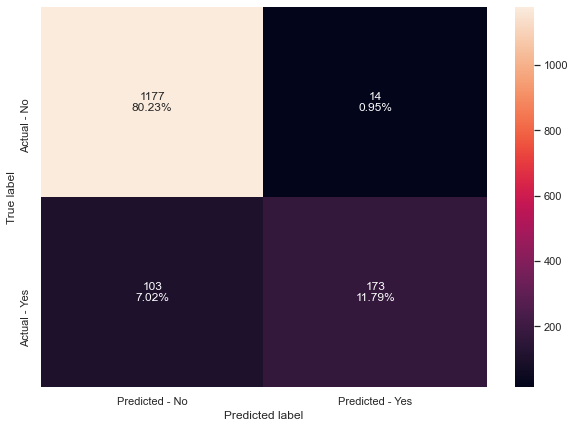

In [377]:
# Generate a confusion matrix to check performance of the tuned random forest classifier
make_confusion_matrix(rfClass_tuned,y_test)

In [389]:
# Check performance metrics of the random forest classifier
tuned_rf_estimator_score=get_metrics_score(rfClass_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9202453987730062
Recall on training set :  1.0
Recall on test set :  0.6268115942028986
Precision on training set :  1.0
Precision on test set :  0.9251336898395722
F1 Score on training set :  1.0
F1 Score on test set :  0.7473002159827214


#### Observations
* Still overfitting to the training data, but Precision and Recall have improved
* F1 score has improved, too

<a href = #TOC>Back to Top</a>

# <a id = "link7"></a>7. Model Building: Boosting
Build Adaboost, gradient boost, xgboost, and stacking classifier

## AdaBoost Classifier

In [379]:
# Create AdaBoost classifier and fit to training data
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

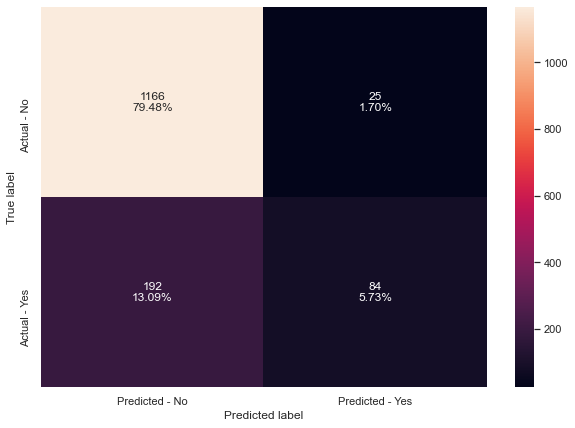

In [380]:
# Create a confusion matrix for the AdaBoost classifier
make_confusion_matrix(abc,y_test)

In [394]:
# Check performance metrics of the AdaBoost classifier
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8447822274188833
Accuracy on test set :  0.8520790729379687
Recall on training set :  0.2779503105590062
Recall on test set :  0.30434782608695654
Precision on training set :  0.7306122448979592
Precision on test set :  0.7706422018348624
F1 Score on training set :  0.40269966254218226
F1 Score on test set :  0.4363636363636364


## Observations
* AdaBoost is not overfitting
* AdaBoost is giving OK precision scores, but poor recall scores, which is causing a low F1 score

## Gradient Boost Classifier

In [391]:
# Create the Gradient Boost classifier and fit to training data
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

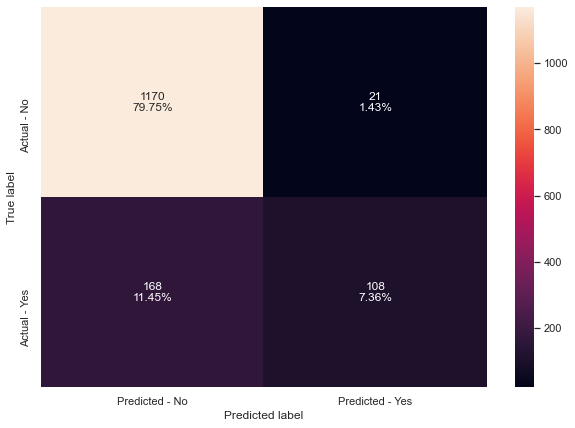

In [392]:
# Create a confusion matrix for the Gradient Boost classifier
make_confusion_matrix(gbc,y_test)

In [395]:
# Check performance metrics of the Gradient Boost classifier
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8827828120432623
Accuracy on test set :  0.8711656441717791
Recall on training set :  0.4409937888198758
Recall on test set :  0.391304347826087
Precision on training set :  0.8738461538461538
Precision on test set :  0.8372093023255814
F1 Score on training set :  0.586171310629515
F1 Score on test set :  0.5333333333333333


#### Observations
* Gradient Boost is not overfitting
* Recall, Precision, and F1 are all higher than AdaBoost

## XGBoost Classifier

In [398]:
# Create XGBoost classifier and fit to training data
xgb = XGBClassifier(random_state=1,eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

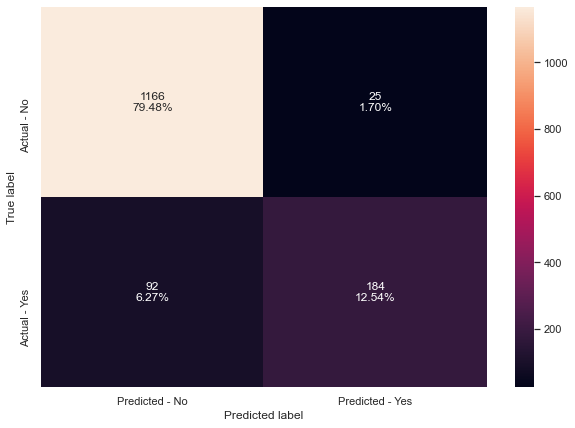

In [399]:
# Create confusion matrix for XGBoost classifier
make_confusion_matrix(xgb,y_test)

In [400]:
# Check performance metrics of the XGBoost classifier
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.997953814674072
Accuracy on test set :  0.9202453987730062
Recall on training set :  0.9891304347826086
Recall on test set :  0.6666666666666666
Precision on training set :  1.0
Precision on test set :  0.8803827751196173
F1 Score on training set :  0.994535519125683
F1 Score on test set :  0.7587628865979382


#### Observations
* XGBoost is overfitting on the training data
* Performance on Recall, Precision, and F1 is high

<a href = #TOC>Back to Top</a>

# <a id = "link8"></a>8. Model Performance Improvement: Boosting
Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment

## Hyperparameter Tuning: AdaBoost

In [402]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.8, n_estimators=100, random_state=1)

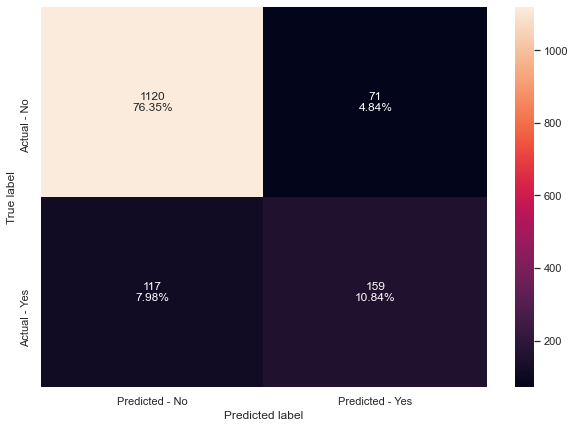

In [403]:
# Create a confusion matrix for the tuned AdaBoost Classifier
make_confusion_matrix(abc_tuned,y_test)

In [404]:
# Check the performance metrics for the tuned AdaBoost Classifier
tuned_abc = get_metrics_score(abc_tuned)

Accuracy on training set :  0.9789535223618825
Accuracy on test set :  0.8718473074301295
Recall on training set :  0.9099378881987578
Recall on test set :  0.5760869565217391
Precision on training set :  0.9766666666666667
Precision on test set :  0.691304347826087
F1 Score on training set :  0.9421221864951768
F1 Score on test set :  0.6284584980237155


#### Observations
* AdaBoost is now overfitting after tuning
* Metrics on test did improve, though

## Hyperparameter Tuning: Gradient Boost

In [405]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations


# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.9)

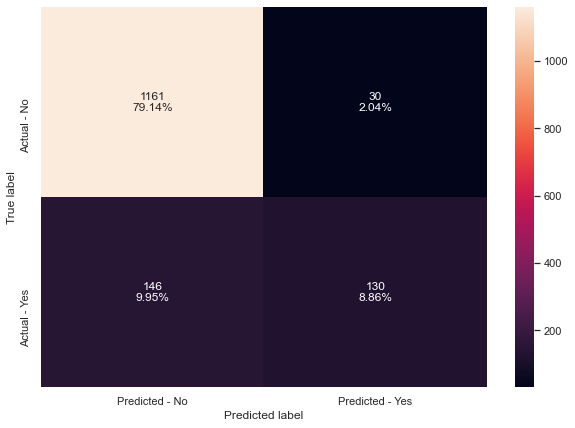

In [406]:
# Create a confusion matrix for the tuned Gradient Boost Classifier
make_confusion_matrix(gbc_tuned,y_test)

In [407]:
# Check the performance metrics for the tuned Gradient Classifier
tuned_gbc = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9155217772581117
Accuracy on test set :  0.880027266530334
Recall on training set :  0.5978260869565217
Recall on test set :  0.47101449275362317
Precision on training set :  0.927710843373494
Precision on test set :  0.8125
F1 Score on training set :  0.7271010387157695
F1 Score on test set :  0.5963302752293579


#### Observations
* Precision decreased slightly, but Recall increased enough that F1 score increased after tuning

## Hyperparameter Tuning: XGBoost

In [433]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss', use_label_encoder=False)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(30,100,20),
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=f1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

/Users/mikegroesser/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

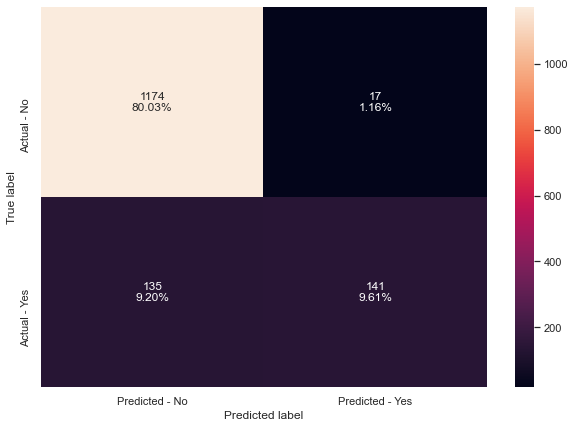

In [414]:
# Create a confusion matrix for the tuned XGBoost Classifier
make_confusion_matrix(xgb_tuned,y_test)

In [434]:
# Get performance metrics for the tuned XGBoost classifier
tuned_xgb = get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9517684887459807
Accuracy on test set :  0.896387184730743
Recall on training set :  0.75
Recall on test set :  0.5108695652173914
Precision on training set :  0.9917864476386037
Precision on test set :  0.8924050632911392
F1 Score on training set :  0.8541114058355437
F1 Score on test set :  0.6497695852534562


#### Observations
* XGBoost is still somewhat overfitting on training data, though it's better than before
* F1 score decreased

## Stacking with Tuned Models

In [423]:
# Select the estimators for the stacking model
estimators=[('Decision Tree', dTree_tuned),('Random Forest', rfClass_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1, eval_metric='logloss', use_label_encoder=False)

In [424]:
# Create the stacking model and fit to training data
stacking=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=6,
                                                       max_leaf_nodes=15,
                                                       min_impurity_decrease=1e-05,
                                                       min_samples_leaf=5,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features='sqrt',
                                                       n_estimators=23,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(ran...
                                                 interaction_constra

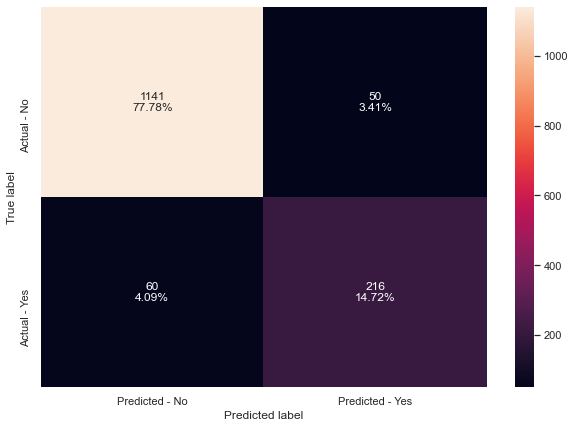

In [425]:
# Create a confusion matrix for the Stacking model
make_confusion_matrix(stacking,y_test)

In [426]:
# Get performance metrics for the stacking model
stacking_metrics = get_metrics_score(stacking)

Accuracy on training set :  0.994153756211634
Accuracy on test set :  0.9250170415814588
Recall on training set :  0.9906832298136646
Recall on test set :  0.782608695652174
Precision on training set :  0.9785276073619632
Precision on test set :  0.8120300751879699
F1 Score on training set :  0.9845679012345679
F1 Score on test set :  0.7970479704797048


#### Observations
* Stacking overfits on the training data
* Recall, Precision, and F1 scores are all very high

<a href = #TOC>Back to Top</a>

# <a id = "link9"></a>9. Model Performance Evaluation
Evaluate the model on different performance metrics and comment on the performance and scope of improvement

In [427]:
# Define list of models
models = [dTree, dTree_tuned, bagClass, bagClass_tuned, rfClass, rfClass_tuned, abc, abc_tuned, gbc, gbc_tuned, xgb, xgb_tuned, stacking]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
F1_train = []
F1_test = []

# looping through all the models to get the accuracy, recall, precision, and F1 scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    F1_train.append(np.round(j[6],2))
    F1_test.append(np.round(j[7],2))

In [428]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree', 'Decision Tree Tuned',
                                          'Bagging', 'Bagging Tuned',
                                          'Random Forest', 'Random Forest Tuned',
                                          'AdaBoost','AdaBoost Tuned', 
                                          'Gradient Boosting','Gradient Boosting Tuned',
                                          'XGBoost','XGBoost Tuned',
                                          'Stacking'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1': F1_train, 'Test_F1': F1_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree,1.00,0.89,1.00,0.73,1.00,0.69,1.00,0.71
1,Decision Tree Tuned,0.85,0.84,0.33,0.31,0.69,0.70,0.44,0.43
2,Bagging,0.99,0.91,0.97,0.58,1.00,0.88,0.98,0.70
3,Bagging Tuned,1.00,0.92,1.00,0.66,1.00,0.92,1.00,0.77
4,Random Forest,1.00,0.92,1.00,0.63,1.00,0.94,1.00,0.75
5,Random Forest Tuned,1.00,0.92,1.00,0.63,1.00,0.93,1.00,0.75
6,AdaBoost,0.84,0.85,0.28,0.30,0.73,0.77,0.40,0.44
7,AdaBoost Tuned,0.98,0.87,0.91,0.58,0.98,0.69,0.94,0.63
8,Gradient Boosting,0.88,0.87,0.44,0.39,0.87,0.84,0.59,0.53
9,Gradient Boosting Tuned,0.92,0.88,0.60,0.47,0.93,0.81,0.73,0.60


#### Observations
* Most of the models are overfitting the training data
* The models that don't overfit have much lower recall, precision and F1

## Feature Importance of Top Models

I want to check the feature importance of a few of the better models to see if they are similar and to find out what insights I can derive from it.

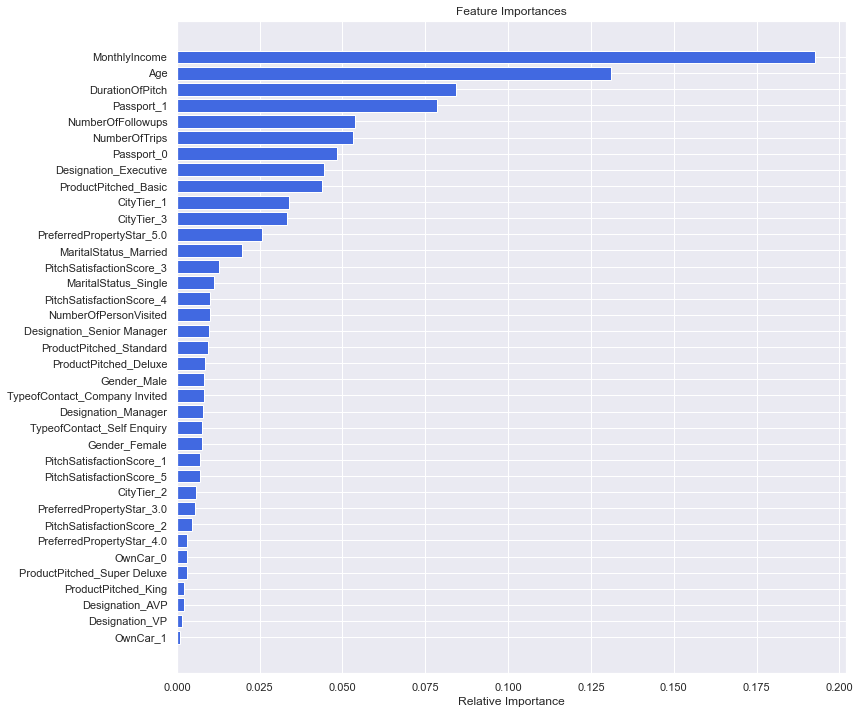

In [429]:
# Check feature importance of tuned Gradient Boosting model
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='royalblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

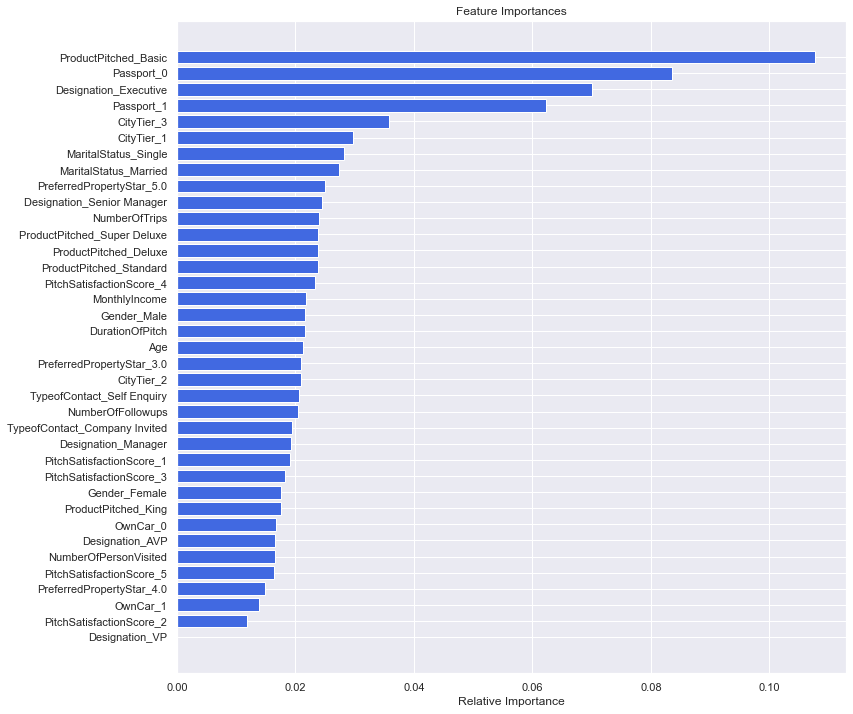

In [430]:
# Check feature importance of tuned XGBoost model
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='royalblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

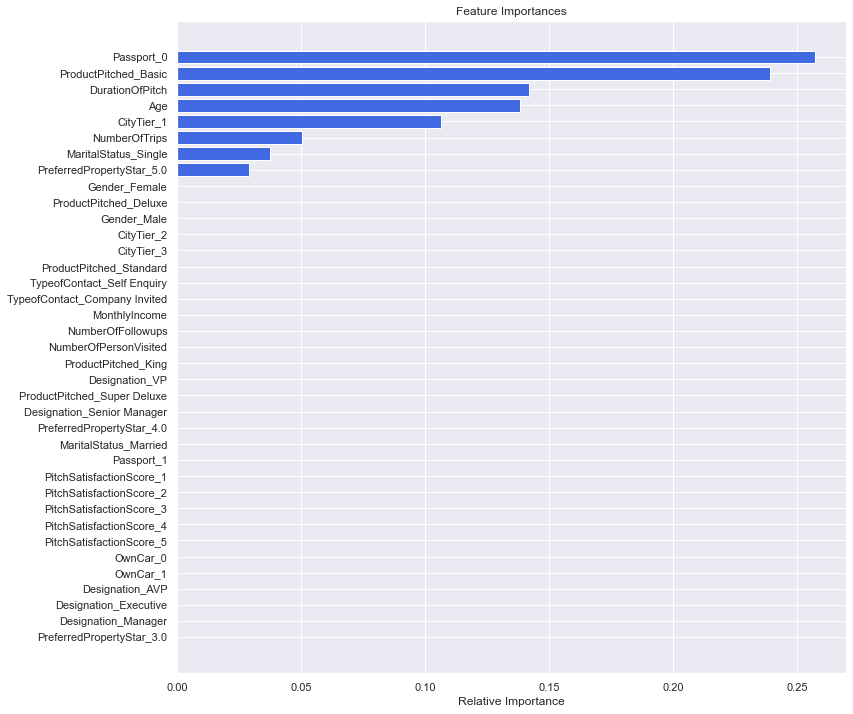

In [431]:
# Check feature importance of tuned Decision Tree
importances = dTree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='royalblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

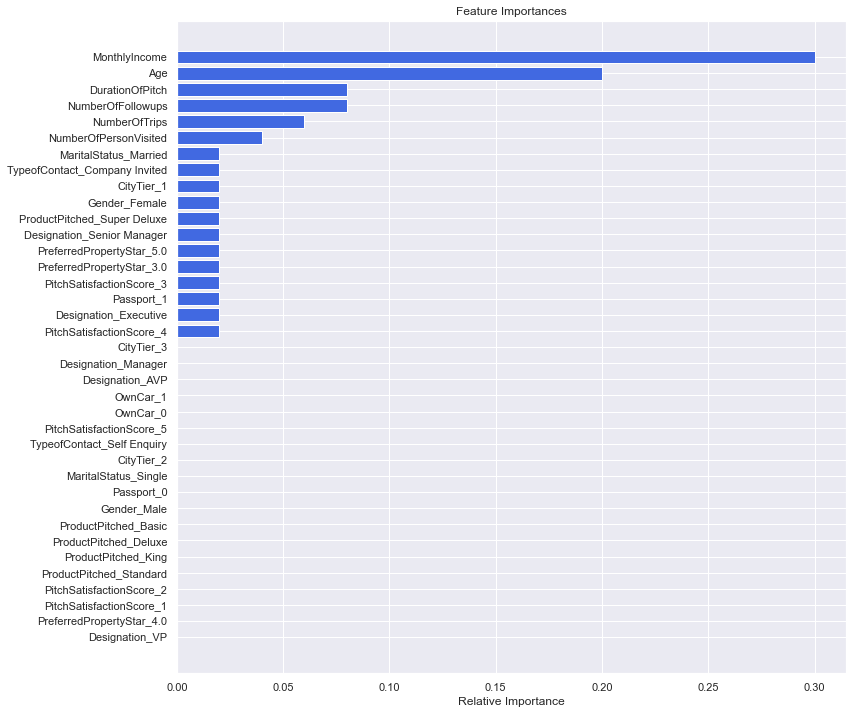

In [432]:
# Check feature importance of AdaBoost model
importances = abc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='royalblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<a href = #TOC>Back to Top</a>

# <a id = "link10"></a>10. Actionable Insights & Recommendations
Conclude with the key takeaways for the business - What would your advice be to grow the business?

* I wouldn't be abe to offer any conculsive insights from these models just yet, but I could say that the models do seem to agree on a few features that are more important than the rest: Monthly Income, Age, Passport, the Duration of Pitch, and to a lesser extent the Number of Follow Ups. 
* Based on the EDA, I would recommend

<a href = #TOC>Back to Top</a>